#Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import joblib

#Import Dataset

In [ ]:
data_1=pd.read_csv('/content/UTS Sistem Informasi Manajemen (1).csv')
data_2=pd.read_csv('/content/UTS Sistem Informasi Manajemen (Nilai).csv')

data_1.head()

,Cap waktu,Nama Lengkap,NIM,Kelas,Jawaban Pertanyaan 1,Jawaban Pertanyaan 2,Jawaban Pertanyaan 3,Unnamed: 7,Jawaban Pertanyaan 4a,Jawaban Pertanyaan 4b,Jawaban Pertanyaan 4c,Jawaban Pertanyaan 4d,Jawaban Pertanyaan 5,Nilai No 5,Nilai No 5.1,Jawaban Pertanyaan 6
0,2022/11/23 8:28:29 AM GMT+7,Muhammad Aidil Rifki Rivaldy,103117024,MN-B,Dalam mengimplementasikan sebuah perubahan pad...,A. Kelebihan Cloud Computing\n1. Mudah Di Akse...,Keuntungan pemerintah dapat mendata seluruh ke...,5,e-Satria dapat mempermudah Kanwil Pajak dalam ...,Keunggulan dari adanya BIMMA dapat dirasakan o...,inas Kependudukan dan Pencatatan Sipil mempuny...,e-Punten dapat mempermudah disdukcapil melihat...,Big data adalah kumpulan data yang lebih besar...,True,10,\nInfrastruktur Big Data merupakan teknologi y...
1,2022/11/23 8:36:26 AM GMT+7,FIRDA KHAIRANI,103121078,MN-B,Kendala-kendala dalam mengimplementasikan Sist...,Kelebihan dan kekurangan menggunakan Cloud Com...,Apa saja keuntungan untuk pemerintah dan pelak...,5,proses bisnis apa saja yang terbantu dengan ad...,BIMMA (Bandung Integrated Manpower Management ...,Salaman\n\nJawab :\n\nHadirnya aplikasi Salama...,e-PunTEN\n\nJawab :\n\ne-PunTEN (Elektronik Pe...,Apakah yang dimaksud dengan teknologi big data...,False,5,Menurut Anda apa infrastruktur yang paling uta...
2,2022/11/23 8:44:46 AM GMT+7,LARAS SHINTA MAHARANI,103121074,MN-B,Kendala yang dihadapi Pemerintah Kota Bandung ...,Kelebihan Cloud Computing: \n1. Cloud bisa dig...,Aplikasi SIRKUIT (Sistem Informasi Kewirausaha...,5,Proses bisnis yang terbantu dengan adanya apli...,Proses bisnis yang terbantu dengan adanya apli...,Proses bisnis yang terbantu dengan adanya apli...,Proses bisnis yang terbantu dengan adanya apli...,Teknologi big data adalah sistem pengaturan ma...,True,10,Infrastruktur yang paling utama dalam implemen...
3,2022/11/23 8:45:29 AM GMT+7,Rizky Boyma Panjaitan,103120026,MN-B,"1.\tMenurut saya, kendala-kendala dalam mengim...","2.\tKelebihan Cloud Computing ialah, Kapasitas...",3.\tKeuntungan bagi pemerintah ialah menjadika...,10,"e-Satria, terbantu pada proses pembayaran waji...","BIMMA, Memudahkan untuk mengurus kartu pencari...","Salaman, terbantu dalam proses pelayanan admin...","e-PunTEN, terbantu dalam proses pelayanan admi...","5.\tBig data ialah, sekumpulan data yang besar...",True,10,6.\t- High Performance Computing Cluster (HPCC...
4,2022/11/23 8:46:05 AM GMT+7,BAGAS ADI WIBOWO,103120006,MN-A,Menurut saya kendala-kendala dalam mengimpleme...,Kelebihan :\n1. Dapat diakses dari mana saja d...,Keuntungan untuk pemerintah kota :\n1. Pertumb...,10,E-SATRiA ini bertujuan untuk mempermudah masya...,BIMMA merupakan sebuah aplikasi yang dihadirka...,Salaman merupakan aplikasi administrasi kepend...,E-Punten merupakan aplikasi kependudukan juga ...,Teknologi big data merupakan sebuah teknologi ...,True,10,Menurut saya infrastruktur yang paling utama d...


##Pembersihan dataset

In [ ]:
data_1.columns

Index(['Cap waktu', 'Nama Lengkap', 'NIM', 'Kelas', 'Jawaban Pertanyaan 1',
       'Jawaban Pertanyaan 2', 'Jawaban Pertanyaan 3 ', 'Unnamed: 7',
       'Jawaban Pertanyaan 4a', 'Jawaban Pertanyaan 4b',
       'Jawaban Pertanyaan 4c', 'Jawaban Pertanyaan 4d',
       'Jawaban Pertanyaan 5', 'Nilai No 5', 'Nilai No 5.1',
       'Jawaban Pertanyaan 6'],
      dtype='object')

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cap waktu              122 non-null    object
 1   Nama Lengkap           122 non-null    object
 2   NIM                    122 non-null    int64 
 3   Kelas                  122 non-null    object
 4   Jawaban Pertanyaan 1   122 non-null    object
 5   Jawaban Pertanyaan 2   122 non-null    object
 6   Jawaban Pertanyaan 3   122 non-null    object
 7   Unnamed: 7             122 non-null    int64 
 8   Jawaban Pertanyaan 4a  122 non-null    object
 9   Jawaban Pertanyaan 4b  122 non-null    object
 10  Jawaban Pertanyaan 4c  122 non-null    object
 11  Jawaban Pertanyaan 4d  122 non-null    object
 12  Jawaban Pertanyaan 5   122 non-null    object
 13  Nilai No 5             122 non-null    bool  
 14  Nilai No 5.1           122 non-null    int64 
 15  Jawaban Pertanyaan 6   

In [ ]:
colums_to_drop=['Cap waktu','Kelas','Nama Lengkap','Unnamed: 7','Jawaban Pertanyaan 4a','Jawaban Pertanyaan 4b',
                'Jawaban Pertanyaan 4c','Jawaban Pertanyaan 4d','Nilai No 5','Nilai No 5.1']
data_1=data_1.drop(colums_to_drop,axis=1)
data_1.rename(columns={'Jawaban Pertanyaan 3 ':'Jawaban Pertanyaan 3','Jawaban Pertanyaan 5':'Jawaban Pertanyaan 4','Jawaban Pertanyaan 6':'Jawaban Pertanyaan 5'},inplace=True)
data_1

,NIM,Jawaban Pertanyaan 1,Jawaban Pertanyaan 2,Jawaban Pertanyaan 3,Jawaban Pertanyaan 4,Jawaban Pertanyaan 5
0,103117024,Dalam mengimplementasikan sebuah perubahan pad...,A. Kelebihan Cloud Computing\n1. Mudah Di Akse...,Keuntungan pemerintah dapat mendata seluruh ke...,Big data adalah kumpulan data yang lebih besar...,\nInfrastruktur Big Data merupakan teknologi y...
1,103121078,Kendala-kendala dalam mengimplementasikan Sist...,Kelebihan dan kekurangan menggunakan Cloud Com...,Apa saja keuntungan untuk pemerintah dan pelak...,Apakah yang dimaksud dengan teknologi big data...,Menurut Anda apa infrastruktur yang paling uta...
2,103121074,Kendala yang dihadapi Pemerintah Kota Bandung ...,Kelebihan Cloud Computing: \n1. Cloud bisa dig...,Aplikasi SIRKUIT (Sistem Informasi Kewirausaha...,Teknologi big data adalah sistem pengaturan ma...,Infrastruktur yang paling utama dalam implemen...
3,103120026,"1.\tMenurut saya, kendala-kendala dalam mengim...","2.\tKelebihan Cloud Computing ialah, Kapasitas...",3.\tKeuntungan bagi pemerintah ialah menjadika...,"5.\tBig data ialah, sekumpulan data yang besar...",6.\t- High Performance Computing Cluster (HPCC...
4,103120006,Menurut saya kendala-kendala dalam mengimpleme...,Kelebihan :\n1. Dapat diakses dari mana saja d...,Keuntungan untuk pemerintah kota :\n1. Pertumb...,Teknologi big data merupakan sebuah teknologi ...,Menurut saya infrastruktur yang paling utama d...
...,...,...,...,...,...,...
117,103120056,Dalam mewujudkan suatu sistem informasi di seb...,Kelebihan Cloud computing :\n1. Efisiensi : ek...,Menurut saya ada beberapa keuntungan yang akan...,Big data merupakan kumpulan besar data tidak t...,Infrastruktur yang paling utama dibutuhkan unt...
118,103121072,menurut saya kendala kendala dalam mengimpleme...,kelebihan dari cloud computing = cloud computi...,keuntungan pemerintah : dengan hadirnya berbag...,yang saya ketahui tentang teknologi big data y...,infrasturktur big data terbagi menjadi dua yai...
119,103121073,Menurut saya dalam mengimplementasikan suatu s...,KELEBIHAN dari menggunakan cloud computing din...,Keuntungan bagi pemerintah ialah mampu mengawa...,Perkembangan teknologi yang pesat menuntut par...,Data Management and Storage menjadi infrastukt...
120,103120085,kendala kendala dalam mengimplentasikan masala...,kelebihan menggunakan Cloud Computing yaitu h...,dengan adanya aplikasi sirkuit atau sistem inf...,teknologi big data adalah merupakan sekumpulan...,Karna dengan adanya proses infrastruktur big d...


In [ ]:
data_1.shape

(122, 6)

Data 1 selsai, pindah ke data 2

In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cap waktu     122 non-null    object 
 1   Nama Lengkap  122 non-null    object 
 2   NIM           122 non-null    float64
 3   Kelas         122 non-null    object 
 4   Nilai No 1    122 non-null    float64
 5   Nilai No 2    122 non-null    float64
 6   Nilai No 3    122 non-null    float64
 7   Nilai No 4    122 non-null    float64
 8   Nilai No 5    122 non-null    float64
 9   Nilai No 6    122 non-null    float64
 10  TOTAL         122 non-null    float64
dtypes: float64(8), object(3)
memory usage: 86.0+ KB


In [ ]:
data_2.shape

(999, 11)

In [ ]:
#Hilangkan nan
data_2=data_2.dropna()

In [ ]:
data_2

,Cap waktu,Nama Lengkap,NIM,Kelas,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Nilai No 6,TOTAL
0,2022/11/23 8:28:29 AM GMT+7,Muhammad Aidil Rifki Rivaldy,103117024.0,MN-B,16.0,30.0,5.0,20.0,10.0,10.0,91.0
1,2022/11/23 8:36:26 AM GMT+7,FIRDA KHAIRANI,103121078.0,MN-B,16.0,30.0,5.0,20.0,5.0,2.0,78.0
2,2022/11/23 8:44:46 AM GMT+7,LARAS SHINTA MAHARANI,103121074.0,MN-B,20.0,25.0,5.0,20.0,10.0,2.0,82.0
3,2022/11/23 8:45:29 AM GMT+7,Rizky Boyma Panjaitan,103120026.0,MN-B,20.0,25.0,10.0,20.0,10.0,10.0,95.0
4,2022/11/23 8:46:05 AM GMT+7,BAGAS ADI WIBOWO,103120006.0,MN-A,20.0,25.0,10.0,20.0,10.0,10.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...
117,2022/11/23 9:44:12 AM GMT+7,Ciya Gusyaf Perta,103120056.0,MN-B,20.0,25.0,10.0,20.0,10.0,2.0,87.0
118,2022/11/23 9:44:13 AM GMT+7,"M,Rasyid Alwi Nasution",103121072.0,MN-B,20.0,15.0,10.0,20.0,10.0,2.0,77.0
119,2022/11/23 9:45:38 AM GMT+7,Pengestu Adi Prasetio,103121073.0,MN-A,16.0,25.0,10.0,20.0,5.0,10.0,86.0
120,2022/11/23 9:46:08 AM GMT+7,Winda Lorenza br Barus,103120085.0,MN-A,14.0,25.0,10.0,20.0,5.0,2.0,76.0


In [ ]:
data_2_columns_to_drop=['Cap waktu','Nama Lengkap','Kelas','TOTAL']
data_2=data_2.drop(data_2_columns_to_drop,axis=1)
data_2.head()

,NIM,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Nilai No 6
0,103117024.0,16.0,30.0,5.0,20.0,10.0,10.0
1,103121078.0,16.0,30.0,5.0,20.0,5.0,2.0
2,103121074.0,20.0,25.0,5.0,20.0,10.0,2.0
3,103120026.0,20.0,25.0,10.0,20.0,10.0,10.0
4,103120006.0,20.0,25.0,10.0,20.0,10.0,10.0


In [ ]:
nilai=data_2[['Nilai No 1','Nilai No 2','Nilai No 3','Nilai No 4','Nilai No 5']]
nilai.head()

,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5
0,16.0,30.0,5.0,20.0,10.0
1,16.0,30.0,5.0,20.0,5.0
2,20.0,25.0,5.0,20.0,10.0
3,20.0,25.0,10.0,20.0,10.0
4,20.0,25.0,10.0,20.0,10.0


(array([ 3.,  0.,  0.,  2.,  0.,  0.,  3., 30., 14., 70.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <BarContainer object of 10 artists>)

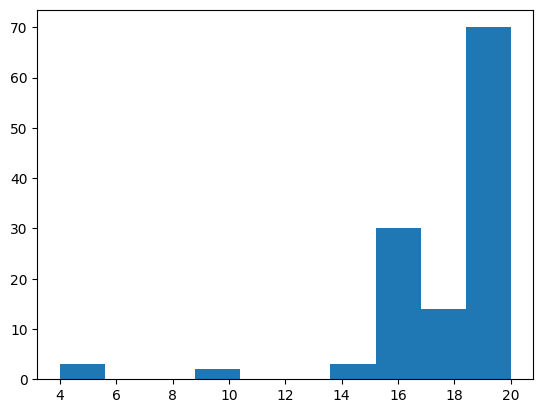

In [ ]:
plt.hist(nilai['Nilai No 1'])

In [ ]:
data_2.describe()

,NIM,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Nilai No 6
count,1.220000e+02,122.000000,122.000000,122.000000,122.0,122.000000,122.000000
mean,1.031201e+08,18.081967,23.524590,8.614754,20.0,7.663934,4.688525
std,7.575922e+02,3.100494,5.950503,2.779639,0.0,2.504906,3.794476
min,1.031170e+08,4.000000,0.000000,0.000000,20.0,5.000000,2.000000
25%,1.031200e+08,16.000000,25.000000,8.000000,20.0,5.000000,2.000000
50%,1.031201e+08,20.000000,25.000000,10.000000,20.0,10.000000,2.000000
75%,1.031210e+08,20.000000,25.000000,10.000000,20.0,10.000000,10.000000
max,1.031211e+08,20.000000,30.000000,20.000000,20.0,10.000000,10.000000


Data nilai 4 memiliki nilai yang seragam pada 122 baris, sehingga diputuskan untuk tidak menggunakan data nilai ke 4. Nomor 5 dan 6 nantinya akan diganti menjadi nomor 4 dan 5.

In [ ]:
data_2['Total']=data_2[['Nilai No 1','Nilai No 2','Nilai No 3','Nilai No 4','Nilai No 5']].sum(axis=1)
data_2.head()

,NIM,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Nilai No 6,Total
0,103117024.0,16.0,30.0,5.0,20.0,10.0,10.0,81.0
1,103121078.0,16.0,30.0,5.0,20.0,5.0,2.0,76.0
2,103121074.0,20.0,25.0,5.0,20.0,10.0,2.0,80.0
3,103120026.0,20.0,25.0,10.0,20.0,10.0,10.0,85.0
4,103120006.0,20.0,25.0,10.0,20.0,10.0,10.0,85.0


In [ ]:
data_2=data_2.drop(['Nilai No 4'],axis=1)
data_2.rename(columns={'Nilai No 5':'Nilai No 4','Nilai No 6':'Nilai No 5'},inplace=True)
data_2

,NIM,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Total
0,103117024.0,16.0,30.0,5.0,10.0,10.0,81.0
1,103121078.0,16.0,30.0,5.0,5.0,2.0,76.0
2,103121074.0,20.0,25.0,5.0,10.0,2.0,80.0
3,103120026.0,20.0,25.0,10.0,10.0,10.0,85.0
4,103120006.0,20.0,25.0,10.0,10.0,10.0,85.0
...,...,...,...,...,...,...,...
117,103120056.0,20.0,25.0,10.0,10.0,2.0,85.0
118,103121072.0,20.0,15.0,10.0,10.0,2.0,75.0
119,103121073.0,16.0,25.0,10.0,5.0,10.0,76.0
120,103120085.0,14.0,25.0,10.0,5.0,2.0,74.0


In [ ]:
dataset=pd.merge(data_1, data_2, on='NIM', how='left')
dataset.head()

,NIM,Jawaban Pertanyaan 1,Jawaban Pertanyaan 2,Jawaban Pertanyaan 3,Jawaban Pertanyaan 4,Jawaban Pertanyaan 5,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Total
0,103117024,Dalam mengimplementasikan sebuah perubahan pad...,A. Kelebihan Cloud Computing\n1. Mudah Di Akse...,Keuntungan pemerintah dapat mendata seluruh ke...,Big data adalah kumpulan data yang lebih besar...,\nInfrastruktur Big Data merupakan teknologi y...,16.0,30.0,5.0,10.0,10.0,81.0
1,103121078,Kendala-kendala dalam mengimplementasikan Sist...,Kelebihan dan kekurangan menggunakan Cloud Com...,Apa saja keuntungan untuk pemerintah dan pelak...,Apakah yang dimaksud dengan teknologi big data...,Menurut Anda apa infrastruktur yang paling uta...,16.0,30.0,5.0,5.0,2.0,76.0
2,103121074,Kendala yang dihadapi Pemerintah Kota Bandung ...,Kelebihan Cloud Computing: \n1. Cloud bisa dig...,Aplikasi SIRKUIT (Sistem Informasi Kewirausaha...,Teknologi big data adalah sistem pengaturan ma...,Infrastruktur yang paling utama dalam implemen...,20.0,25.0,5.0,10.0,2.0,80.0
3,103120026,"1.\tMenurut saya, kendala-kendala dalam mengim...","2.\tKelebihan Cloud Computing ialah, Kapasitas...",3.\tKeuntungan bagi pemerintah ialah menjadika...,"5.\tBig data ialah, sekumpulan data yang besar...",6.\t- High Performance Computing Cluster (HPCC...,20.0,25.0,10.0,10.0,10.0,85.0
4,103120006,Menurut saya kendala-kendala dalam mengimpleme...,Kelebihan :\n1. Dapat diakses dari mana saja d...,Keuntungan untuk pemerintah kota :\n1. Pertumb...,Teknologi big data merupakan sebuah teknologi ...,Menurut saya infrastruktur yang paling utama d...,20.0,25.0,10.0,10.0,10.0,85.0


#EDA

In [ ]:
dataset['NIM']=dataset['NIM'].astype(str)
# dataset=dataset.drop(['NIM'],axis=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NIM                   122 non-null    object 
 1   Jawaban Pertanyaan 1  122 non-null    object 
 2   Jawaban Pertanyaan 2  122 non-null    object 
 3   Jawaban Pertanyaan 3  122 non-null    object 
 4   Jawaban Pertanyaan 4  122 non-null    object 
 5   Jawaban Pertanyaan 5  122 non-null    object 
 6   Nilai No 1            122 non-null    float64
 7   Nilai No 2            122 non-null    float64
 8   Nilai No 3            122 non-null    float64
 9   Nilai No 4            122 non-null    float64
 10  Nilai No 5            122 non-null    float64
 11  Total                 122 non-null    float64
dtypes: float64(6), object(6)
memory usage: 12.4+ KB


In [ ]:
summary=dataset.describe()
styled_summary = summary.style.background_gradient(cmap='coolwarm')

# Menampilkan tabel dengan style
styled_summary

,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Total
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,18.081967,23.524590,8.614754,7.663934,4.688525,77.885246
std,3.100494,5.950503,2.779639,2.504906,3.794476,7.412516
min,4.000000,0.000000,0.000000,5.000000,2.000000,53.000000
25%,16.000000,25.000000,8.000000,5.000000,2.000000,75.000000
50%,20.000000,25.000000,10.000000,10.000000,2.000000,80.000000
75%,20.000000,25.000000,10.000000,10.000000,10.000000,85.000000
max,20.000000,30.000000,20.000000,10.000000,10.000000,93.000000


<ipython-input-21-2f1862064263>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


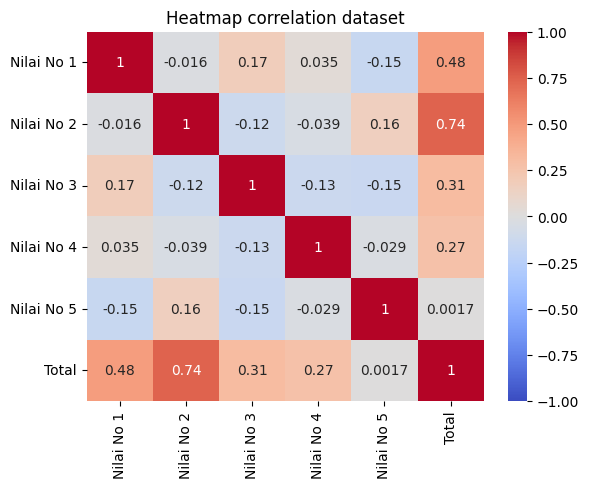

In [ ]:
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap correlation dataset")

# Tampilkan heatmap
plt.show()

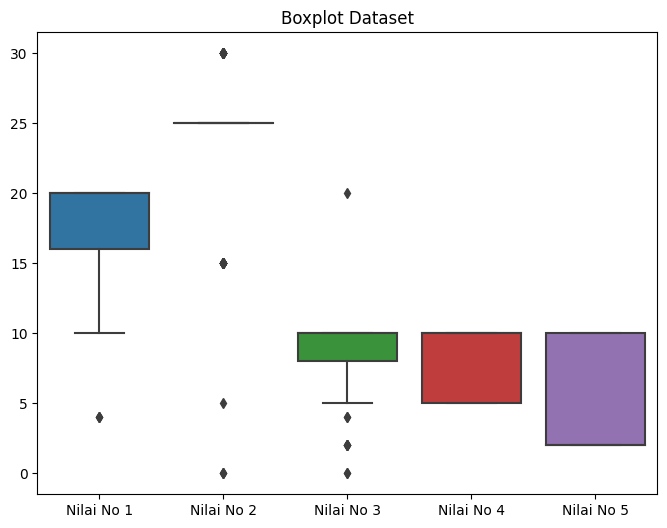

In [ ]:
summary = dataset[['Nilai No 1','Nilai No 2','Nilai No 3','Nilai No 4','Nilai No 5']].describe()

# Visualisasi dengan boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset[['Nilai No 1','Nilai No 2','Nilai No 3','Nilai No 4','Nilai No 5']])
plt.title("Boxplot Dataset")
plt.show()


(array([ 2.,  5., 19.,  1.,  9., 85.,  0.,  0.,  0.,  1.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

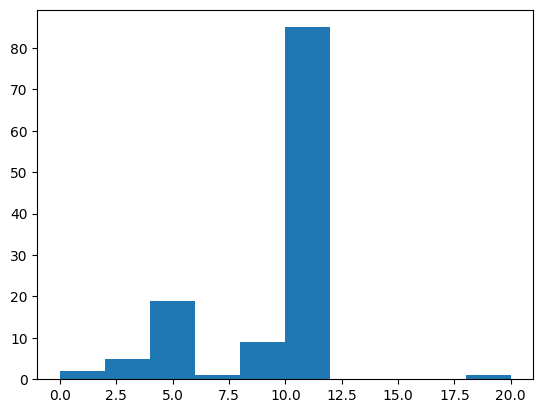

In [ ]:
plt.hist(dataset['Nilai No 3'])

In [ ]:
for i, column in enumerate(dataset[['Nilai No 1', 'Nilai No 2', 'Nilai No 3', 'Nilai No 4', 'Nilai No 5']]):
    skewness = dataset[column].skew()
    print(f"Skewness of {column}: {skewness}")


Skewness of Nilai No 1: -2.653867766907109
Skewness of Nilai No 2: -2.0395278535286807
Skewness of Nilai No 3: -0.7994839286413671
Skewness of Nilai No 4: -0.1330721688755943
Skewness of Nilai No 5: 0.7027759776366974


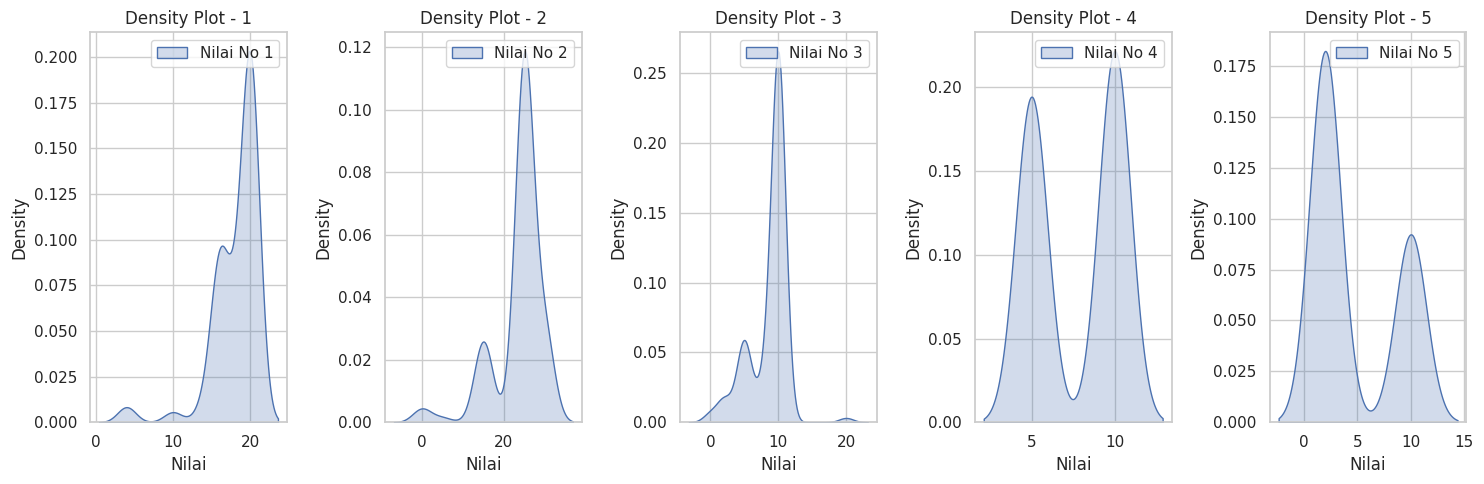

In [ ]:
# Mengatur style plot
sns.set(style="whitegrid")

# Membuat subplots dengan 5 kolom
plt.figure(figsize=(15, 5))

# Membuat density plot untuk setiap nomor
plt.subplot(1, 5, 1)
sns.kdeplot(dataset[['Nilai No 1']], fill=True)
plt.xlabel('Nilai')
plt.title('Density Plot - 1')

plt.subplot(1, 5, 2)
sns.kdeplot(dataset[['Nilai No 2']], fill=True)
plt.xlabel('Nilai')
plt.title('Density Plot - 2')

plt.subplot(1, 5, 3)
sns.kdeplot(dataset[['Nilai No 3']], fill=True)
plt.xlabel('Nilai')
plt.title('Density Plot - 3')

plt.subplot(1, 5, 4)
sns.kdeplot(dataset[['Nilai No 4']], fill=True)
plt.xlabel('Nilai')
plt.title('Density Plot - 4')

plt.subplot(1, 5, 5)
sns.kdeplot(dataset[['Nilai No 5']], fill=True)
plt.xlabel('Nilai')
plt.title('Density Plot - 5')

# Menampilkan plot
plt.tight_layout()
plt.show()

##Normalisasi

In [ ]:
data_2['Nilai No 3'].value_counts()

10.0    85
5.0     17
8.0      9
2.0      5
4.0      2
0.0      2
6.0      1
20.0     1
Name: Nilai No 3, dtype: int64

Dari boxplot diatas terlihat tidak seimbang, dan masih ada outlier. Maka perlu dilakukan normalisasi ke Nilai nomor 1,2,3,4, dan 5.

###PowerTransformation

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [192]:
def power_transform(col):
    transformer = PowerTransformer(method='yeo-johnson')
    return transformer.fit_transform(col.values.reshape(-1, 1)).flatten()

# Melakukan power transformation pada setiap kolom menggunakan apply
dataset_powtrans = dataset[['Nilai No 1', 'Nilai No 2', 'Nilai No 3', 'Nilai No 4', 'Nilai No 5']].apply(power_transform)
dataset_powtrans

,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5
0,-1.174030,1.551103,-1.344055,0.936442,1.405564
1,-1.174030,1.551103,-1.344055,-1.067872,-0.711458
2,0.809198,0.130973,-1.344055,0.936442,-0.711458
3,0.809198,0.130973,0.473392,0.936442,1.405564
4,0.809198,0.130973,0.473392,0.936442,1.405564
...,...,...,...,...,...
117,0.809198,0.130973,0.473392,0.936442,-0.711458
118,0.809198,-1.684112,0.473392,0.936442,-0.711458
119,-1.174030,0.130973,0.473392,-1.067872,1.405564
120,-1.672803,0.130973,0.473392,-1.067872,-0.711458


In [142]:
for i, column in enumerate(dataset_powtrans[['Nilai No 1', 'Nilai No 2', 'Nilai No 3', 'Nilai No 4', 'Nilai No 5']]):
    skewness = dataset_powtrans[column].skew()
    print(f"Skewness of {column}: {skewness}")


Skewness of Nilai No 1: -0.6648327688965208
Skewness of Nilai No 2: -0.6068748889066137
Skewness of Nilai No 3: 0.3236513226028274
Skewness of Nilai No 4: -0.13307216887559473
Skewness of Nilai No 5: 0.7027759776366981


In [ ]:
def density(dataset):
  # Mengatur style plot
  sns.set(style="whitegrid")
  # Membuat subplots dengan 5 kolom
  plt.figure(figsize=(15, 5))
  # Loop untuk membuat density plot untuk setiap kolom
  for i, col in enumerate(dataset.columns):
    plt.subplot(1, 5, i+1)
    sns.kdeplot(dataset[col], fill=True)
    plt.xlabel('Nilai')
    plt.title(f'Density Plot - {col}')

    # Menampilkan plot
  plt.tight_layout()
  plt.show()


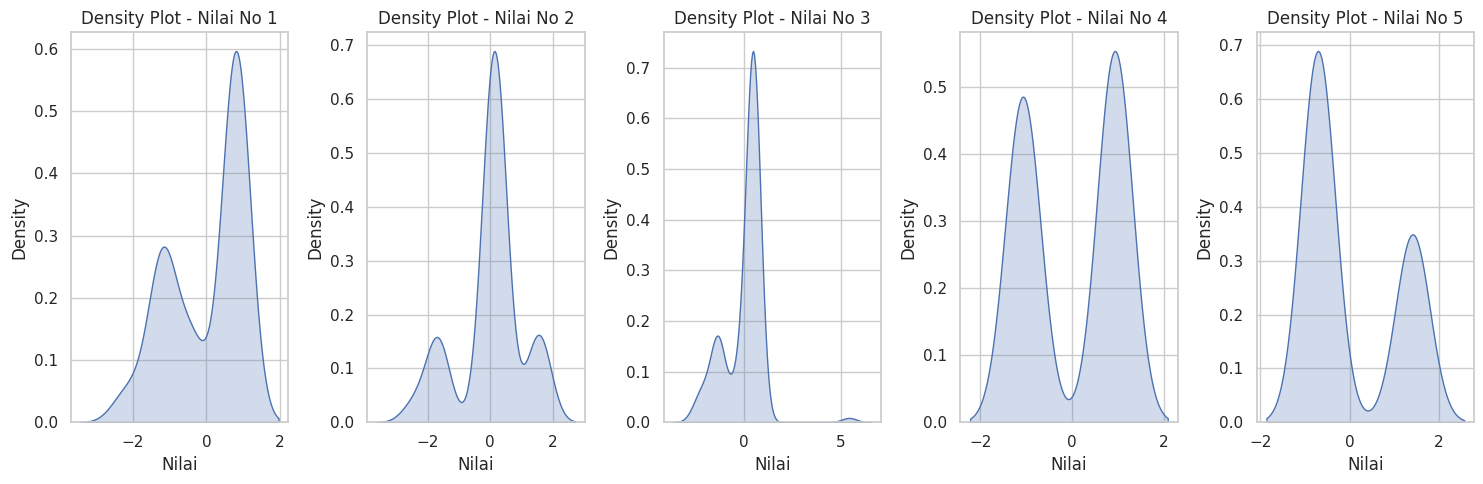

In [ ]:
density(dataset_powtrans)

###MinMaxScaller

In [149]:
def min_max_scaling(df):
    scaled_df = (df - df.min()) / (df.max() - df.min())
    return scaled_df

# dataset[['Nilai No 1','Nilai No 2','Nilai No 3','Nilai No 4','Nilai No 5']] = min_max_scaling(dataset[['Nilai No 1','Nilai No 2','Nilai No 3','Nilai No 4','Nilai No 5']])
nilai[['Nilai No 1','Nilai No 2','Nilai No 3','Nilai No 4','Nilai No 5']] = min_max_scaling(dataset[['Nilai No 1','Nilai No 2','Nilai No 3','Nilai No 4','Nilai No 5']])

In [150]:
for i, column in enumerate(nilai[['Nilai No 1', 'Nilai No 2', 'Nilai No 3', 'Nilai No 4', 'Nilai No 5']]):
    skewness = nilai[column].skew()
    print(f"Skewness of {column}: {skewness}")

Skewness of Nilai No 1: -2.653867766907109
Skewness of Nilai No 2: -2.039527853528677
Skewness of Nilai No 3: -0.799483928641367
Skewness of Nilai No 4: -0.13307216887559484
Skewness of Nilai No 5: 0.7027759776366977


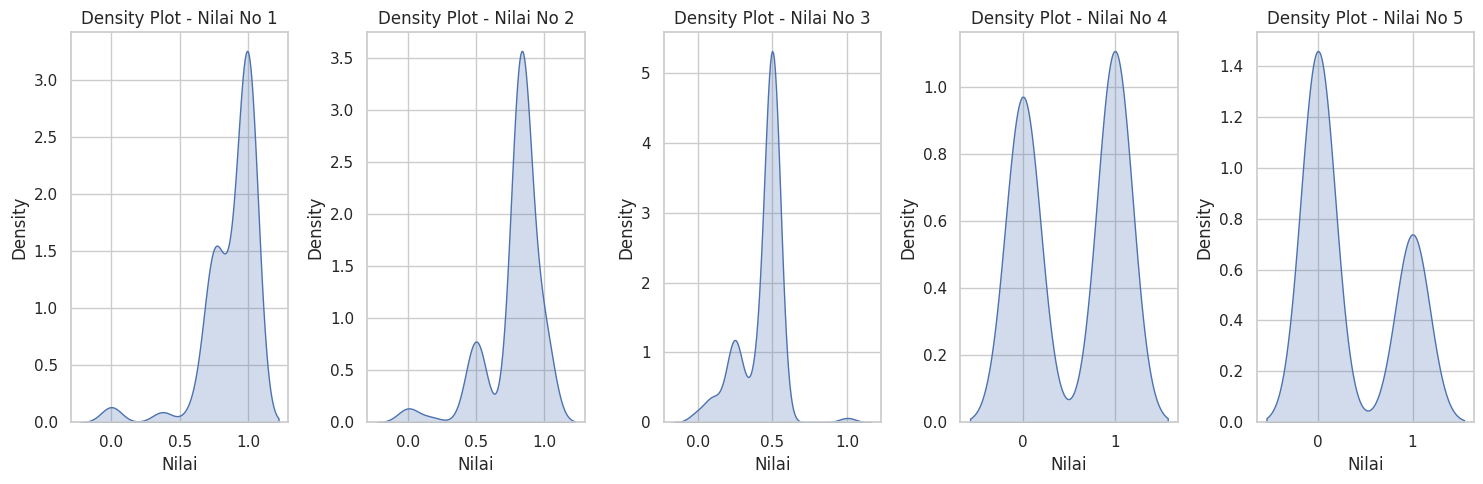

In [ ]:
density(nilai)

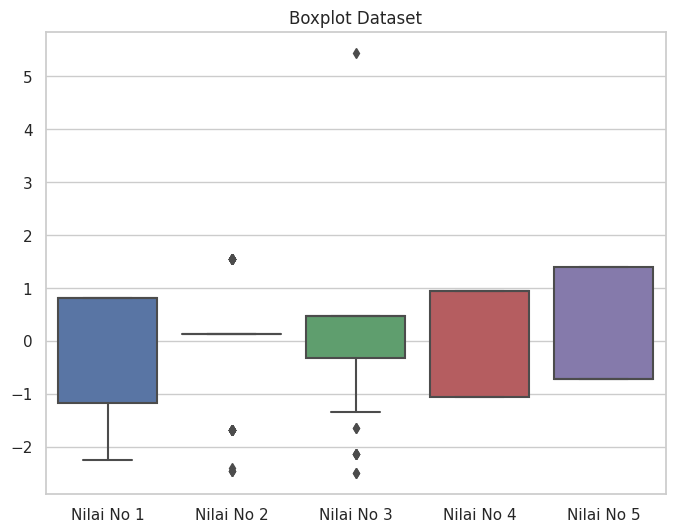

In [ ]:
summary = dataset_powtrans.describe()

# Visualisasi dengan boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset_powtrans[['Nilai No 1','Nilai No 2','Nilai No 3','Nilai No 4','Nilai No 5']])
plt.title("Boxplot Dataset")
plt.show()


In [ ]:
summary=dataset.describe()
styled_summary = summary.style.background_gradient(cmap='coolwarm')

# Menampilkan tabel dengan style
styled_summary

,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Total
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,18.081967,23.524590,8.614754,7.663934,4.688525,77.885246
std,3.100494,5.950503,2.779639,2.504906,3.794476,7.412516
min,4.000000,0.000000,0.000000,5.000000,2.000000,53.000000
25%,16.000000,25.000000,8.000000,5.000000,2.000000,75.000000
50%,20.000000,25.000000,10.000000,10.000000,2.000000,80.000000
75%,20.000000,25.000000,10.000000,10.000000,10.000000,85.000000
max,20.000000,30.000000,20.000000,10.000000,10.000000,93.000000


In [ ]:
dataset.corr()

<ipython-input-37-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Total
Nilai No 1,1.000000,-0.015788,0.172469,0.035500,-0.153762,0.482275
Nilai No 2,-0.015788,1.000000,-0.122088,-0.039085,0.162491,0.737170
Nilai No 3,0.172469,-0.122088,1.000000,-0.130322,-0.145460,0.305085
Nilai No 4,0.035500,-0.039085,-0.130322,1.000000,-0.029364,0.272532
Nilai No 5,-0.153762,0.162491,-0.145460,-0.029364,1.000000,0.001657
Total,0.482275,0.737170,0.305085,0.272532,0.001657,1.000000


In [ ]:
dataset.describe()

,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Total
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,18.081967,23.524590,8.614754,7.663934,4.688525,77.885246
std,3.100494,5.950503,2.779639,2.504906,3.794476,7.412516
min,4.000000,0.000000,0.000000,5.000000,2.000000,53.000000
25%,16.000000,25.000000,8.000000,5.000000,2.000000,75.000000
50%,20.000000,25.000000,10.000000,10.000000,2.000000,80.000000
75%,20.000000,25.000000,10.000000,10.000000,10.000000,85.000000
max,20.000000,30.000000,20.000000,10.000000,10.000000,93.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NIM                   122 non-null    object 
 1   Jawaban Pertanyaan 1  122 non-null    object 
 2   Jawaban Pertanyaan 2  122 non-null    object 
 3   Jawaban Pertanyaan 3  122 non-null    object 
 4   Jawaban Pertanyaan 4  122 non-null    object 
 5   Jawaban Pertanyaan 5  122 non-null    object 
 6   Nilai No 1            122 non-null    float64
 7   Nilai No 2            122 non-null    float64
 8   Nilai No 3            122 non-null    float64
 9   Nilai No 4            122 non-null    float64
 10  Nilai No 5            122 non-null    float64
 11  Total                 122 non-null    float64
dtypes: float64(6), object(6)
memory usage: 12.4+ KB


##Mendefinisikan Rentang


In [ ]:
dataset.describe()

,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Total
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,18.081967,23.524590,8.614754,7.663934,4.688525,77.885246
std,3.100494,5.950503,2.779639,2.504906,3.794476,7.412516
min,4.000000,0.000000,0.000000,5.000000,2.000000,53.000000
25%,16.000000,25.000000,8.000000,5.000000,2.000000,75.000000
50%,20.000000,25.000000,10.000000,10.000000,2.000000,80.000000
75%,20.000000,25.000000,10.000000,10.000000,10.000000,85.000000
max,20.000000,30.000000,20.000000,10.000000,10.000000,93.000000


In [ ]:
dataset['Nilai No 1'].value_counts()

20.0    70
16.0    30
18.0    14
4.0      3
14.0     3
10.0     2
Name: Nilai No 1, dtype: int64

In [ ]:
dataset['Nilai No 2'].value_counts()

25.0    81
30.0    19
15.0    18
0.0      3
5.0      1
Name: Nilai No 2, dtype: int64

In [ ]:
dataset['Nilai No 3'].value_counts()

10.0    85
5.0     17
8.0      9
2.0      5
4.0      2
0.0      2
6.0      1
20.0     1
Name: Nilai No 3, dtype: int64

In [ ]:
dataset['Nilai No 4'].value_counts()

10.0    65
5.0     57
Name: Nilai No 4, dtype: int64

In [ ]:
dataset['Nilai No 5'].value_counts()

2.0     81
10.0    41
Name: Nilai No 5, dtype: int64

###Konversi Rentang

In [ ]:
data_target_3_rentang=dataset[['Nilai No 1', 'Nilai No 2', 'Nilai No 3', 'Nilai No 4', 'Nilai No 5']]
data_target_5_rentang=dataset[['Nilai No 1', 'Nilai No 2', 'Nilai No 3', 'Nilai No 4', 'Nilai No 5']]

###Berdasarkan quantile

In [276]:
q67 = nilai.quantile(0.67)
q34 = nilai.quantile(0.34)

# Fungsi untuk mengkonversi skor menjadi grade berdasarkan kuantil
def convert_score_to_grade(score, q34, q67):
    if score > q67:
        return 'Tinggi'
    elif score > q34:
        return 'Sedang'
    else:
        return 'Rendah'

# Mengkonversi skor ke dalam grade berdasarkan kuantil
for column in nilai.columns:
    data_target_3_rentang[column] = nilai[column].apply(convert_score_to_grade, args=(q34[column], q67[column]))
data_target_3_rentang

,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Nilai No 1_Binned,Nilai No 2_Binned,Nilai No 3_Binned,Nilai No 4_Binned,Nilai No 5_Binned,Nilai No 1_Binned_Binned,Nilai No 2_Binned_Binned,Nilai No 3_Binned_Binned,Nilai No 4_Binned_Binned,Nilai No 5_Binned_Binned
0,Rendah,Tinggi,Rendah,Sedang,Sedang,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah
1,Rendah,Tinggi,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah
2,Sedang,Rendah,Rendah,Sedang,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah
3,Sedang,Rendah,Rendah,Sedang,Sedang,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah
4,Sedang,Rendah,Rendah,Sedang,Sedang,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Sedang,Rendah,Rendah,Sedang,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah
118,Sedang,Rendah,Rendah,Sedang,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah
119,Rendah,Rendah,Rendah,Rendah,Sedang,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah
120,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah,Rendah


In [277]:
q8 = dataset_powtrans.quantile(0.8)
q6 = dataset_powtrans.quantile(0.6)
q4 = dataset_powtrans.quantile(0.4)
q2 = dataset_powtrans.quantile(0.2)

def convert_score_to_grade(score,q2,q4,q6,q8):
    if score >= q8:
        return 'Sangat Tinggi'
    elif score >= q6:
        return 'Tinggi'
    elif score >= q4:
        return 'Sedang'
    elif score >= q2:
        return 'Rendah'
    else:
        return 'Sangat Rendah'

for column in ['Nilai No 1', 'Nilai No 2', 'Nilai No 3', 'Nilai No 4', 'Nilai No 5']:
    data_target_5_rentang[column] = dataset_powtrans[column].apply(convert_score_to_grade,args=(q2[column],q4[column],q6[column],q8[column]))
data_target_5_rentang

,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5
0,Rendah,Sangat Tinggi,Rendah,Sangat Tinggi,Sangat Tinggi
1,Rendah,Sangat Tinggi,Rendah,Sedang,Tinggi
2,Sangat Tinggi,Sangat Tinggi,Rendah,Sangat Tinggi,Tinggi
3,Sangat Tinggi,Sangat Tinggi,Sangat Tinggi,Sangat Tinggi,Sangat Tinggi
4,Sangat Tinggi,Sangat Tinggi,Sangat Tinggi,Sangat Tinggi,Sangat Tinggi
...,...,...,...,...,...
117,Sangat Tinggi,Sangat Tinggi,Sangat Tinggi,Sangat Tinggi,Tinggi
118,Sangat Tinggi,Sangat Rendah,Sangat Tinggi,Sangat Tinggi,Tinggi
119,Rendah,Sangat Tinggi,Sangat Tinggi,Sedang,Sangat Tinggi
120,Sangat Rendah,Sangat Tinggi,Sangat Tinggi,Sedang,Tinggi


### Berdasarkan Equal Freq Binning

In [269]:
EFB_dataset_target_3_label=dataset_powtrans[['Nilai No 1','Nilai No 2','Nilai No 3','Nilai No 4','Nilai No 5']]
EFB_dataset_target_5_label=dataset_powtrans[['Nilai No 1','Nilai No 2','Nilai No 3','Nilai No 4','Nilai No 5']]

In [271]:
import numpy as np
import pandas as pd

# Definisikan fungsi equalObs
def equifreq(arr1, m):
    a = len(arr1)
    n = int(a / m)
    bins = []
    for i in range(0, m):
        arr = []
        for j in range(i * n, (i + 1) * n):
            if j >= a:
                break
            arr.append(arr1[j])
        bins.append(arr)
    return bins

# Define the number of bins
num_bins_3 = 3
num_bins_5 = 5
bining={}
# Equal frequency binning 3 kolom
for col in EFB_dataset_target_3_label.columns:
    # Cut data ke dalam kategori sesuai jumlah bin
    bin_labels = pd.cut(EFB_dataset_target_3_label[col], bins=num_bins_3, labels=False)
    # Ubah hasil binning menjadi kategori diskrit dengan Label Encoder
    encoder = LabelEncoder()
    EFB_dataset_target_3_label[col] = encoder.fit_transform(bin_labels)

In [266]:
#POWTRANS
EFB_dataset_target_3_label['Nilai No 1'].value_counts()

2    70
1    44
0     8
Name: Nilai No 1, dtype: int64

In [250]:
#MinMAx
EFB_3label['Nilai No 1_Binned'].value_counts()

2    114
1      5
0      3
Name: Nilai No 1_Binned, dtype: int64

In [286]:
data_target_3_rentang['Nilai No 1'].value_counts()

1    70
0    52
Name: Nilai No 1, dtype: int64

In [272]:
# Equal frequency binning
for col in EFB_dataset_target_3_label.columns:
    # Cut data ke dalam kategori sesuai jumlah bin
    bin_labels = pd.cut(EFB_dataset_target_5_label[col], bins=num_bins_5, labels=False)
    # Ubah hasil binning menjadi kategori diskrit dengan Label Encoder
    encoder = LabelEncoder()
    EFB_dataset_target_5_label[col] = encoder.fit_transform(bin_labels)

In [287]:
#POWTRANS
EFB_dataset_target_5_label['Nilai No 1'].value_counts()

3    70
1    30
2    14
0     8
Name: Nilai No 1, dtype: int64

In [288]:
data_target_5_rentang['Nilai No 1'].value_counts()

2    70
0    30
3    14
1     8
Name: Nilai No 1, dtype: int64

##Encode Label

###LabelEncoder

In [278]:
from sklearn.preprocessing import LabelEncoder
fitur_to_encode = ['Nilai No 1', 'Nilai No 2','Nilai No 3','Nilai No 4','Nilai No 5']
label_encoder = LabelEncoder()
for column in fitur_to_encode:
  data_target_3_rentang[column] = label_encoder.fit_transform(data_target_3_rentang[column])
  data_target_5_rentang[column] = label_encoder.fit_transform(data_target_5_rentang[column])

data_target_5_rentang.head()

,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5
0,0,1,0,0,0
1,0,1,0,1,1
2,2,1,0,0,1
3,2,1,2,0,0
4,2,1,2,0,0


In [216]:
data_target_3_rentang['Nilai No 3'].value_counts()

0    121
1      1
Name: Nilai No 3, dtype: int64

In [215]:
dataset_test['Nilai No 3_Binned'].value_counts()

1    94
0    27
2     1
Name: Nilai No 3_Binned, dtype: int64

###One Hot Encode

In [ ]:
# def convert_score_to_grade(score):
#     if score >= 80:
#         return 'A'
#     elif score >= 60:
#         return 'B'
#     elif score >= 40:
#         return 'C'
#     elif score >= 20:
#         return 'D'
#     else:
#         return 'E'

# dataset['Nilai_Huruf'] = dataset['Total'].apply(convert_score_to_grade)
# dataset


##Regex

In [ ]:
# Assuming dataset is already defined

kolom_jawaban=['Jawaban Pertanyaan 1',
       'Jawaban Pertanyaan 2', 'Jawaban Pertanyaan 3',
       'Jawaban Pertanyaan 4','Jawaban Pertanyaan 5']

pola = r"[^A-Za-z\s]"

for i in kolom_jawaban:
    dataset[i] = dataset[i].str.replace('\t', '')
    dataset[i] = dataset[i].str.replace('\n', '')
    dataset[i] = dataset[i].str.replace(':', '')
    dataset[i] = dataset[i].str.replace(pola, ' ', regex=True)
    dataset[i] = dataset[i].str.replace(r'\s+', ' ', regex=True)  # Mengganti lebih dari satu spasi dengan satu spasi


In [ ]:
dataset.head()

,NIM,Jawaban Pertanyaan 1,Jawaban Pertanyaan 2,Jawaban Pertanyaan 3,Jawaban Pertanyaan 4,Jawaban Pertanyaan 5,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Total
0,103117024,Dalam mengimplementasikan sebuah perubahan pad...,A Kelebihan Cloud Computing Mudah Di Akses dim...,Keuntungan pemerintah dapat mendata seluruh ke...,Big data adalah kumpulan data yang lebih besar...,Infrastruktur Big Data merupakan teknologi yan...,16.0,30.0,5.0,10.0,10.0,81.0
1,103121078,Kendala kendala dalam mengimplementasikan Sist...,Kelebihan dan kekurangan menggunakan Cloud Com...,Apa saja keuntungan untuk pemerintah dan pelak...,Apakah yang dimaksud dengan teknologi big data...,Menurut Anda apa infrastruktur yang paling uta...,16.0,30.0,5.0,5.0,2.0,76.0
2,103121074,Kendala yang dihadapi Pemerintah Kota Bandung ...,Kelebihan Cloud Computing Cloud bisa digunakan...,Aplikasi SIRKUIT Sistem Informasi Kewirausahaa...,Teknologi big data adalah sistem pengaturan ma...,Infrastruktur yang paling utama dalam implemen...,20.0,25.0,5.0,10.0,2.0,80.0
3,103120026,Menurut saya kendala kendala dalam mengimplem...,Kelebihan Cloud Computing ialah Kapasitas pen...,Keuntungan bagi pemerintah ialah menjadikan k...,Big data ialah sekumpulan data yang besar yan...,High Performance Computing Cluster HPCC ialah...,20.0,25.0,10.0,10.0,10.0,85.0
4,103120006,Menurut saya kendala kendala dalam mengimpleme...,Kelebihan Dapat diakses dari mana saja dan kap...,Keuntungan untuk pemerintah kota Pertumbuhan p...,Teknologi big data merupakan sebuah teknologi ...,Menurut saya infrastruktur yang paling utama d...,20.0,25.0,10.0,10.0,10.0,85.0


In [ ]:
dataset['Jawaban Pertanyaan 1']

0      Dalam mengimplementasikan sebuah perubahan pad...
1      Kendala kendala dalam mengimplementasikan Sist...
2      Kendala yang dihadapi Pemerintah Kota Bandung ...
3       Menurut saya kendala kendala dalam mengimplem...
4      Menurut saya kendala kendala dalam mengimpleme...
                             ...                        
117    Dalam mewujudkan suatu sistem informasi di seb...
118    menurut saya kendala kendala dalam mengimpleme...
119    Menurut saya dalam mengimplementasikan suatu s...
120    kendala kendala dalam mengimplentasikan masala...
121    Menurut saya ada beberapa kendala yang akan di...
Name: Jawaban Pertanyaan 1, Length: 122, dtype: object

In [ ]:
#Data yang akan diproses
data_preprocess= dataset.drop(['NIM'],axis=1)
data_preprocess

,Jawaban Pertanyaan 1,Jawaban Pertanyaan 2,Jawaban Pertanyaan 3,Jawaban Pertanyaan 4,Jawaban Pertanyaan 5,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Total
0,Dalam mengimplementasikan sebuah perubahan pad...,A Kelebihan Cloud Computing Mudah Di Akses dim...,Keuntungan pemerintah dapat mendata seluruh ke...,Big data adalah kumpulan data yang lebih besar...,Infrastruktur Big Data merupakan teknologi yan...,16.0,30.0,5.0,10.0,10.0,81.0
1,Kendala kendala dalam mengimplementasikan Sist...,Kelebihan dan kekurangan menggunakan Cloud Com...,Apa saja keuntungan untuk pemerintah dan pelak...,Apakah yang dimaksud dengan teknologi big data...,Menurut Anda apa infrastruktur yang paling uta...,16.0,30.0,5.0,5.0,2.0,76.0
2,Kendala yang dihadapi Pemerintah Kota Bandung ...,Kelebihan Cloud Computing Cloud bisa digunakan...,Aplikasi SIRKUIT Sistem Informasi Kewirausahaa...,Teknologi big data adalah sistem pengaturan ma...,Infrastruktur yang paling utama dalam implemen...,20.0,25.0,5.0,10.0,2.0,80.0
3,Menurut saya kendala kendala dalam mengimplem...,Kelebihan Cloud Computing ialah Kapasitas pen...,Keuntungan bagi pemerintah ialah menjadikan k...,Big data ialah sekumpulan data yang besar yan...,High Performance Computing Cluster HPCC ialah...,20.0,25.0,10.0,10.0,10.0,85.0
4,Menurut saya kendala kendala dalam mengimpleme...,Kelebihan Dapat diakses dari mana saja dan kap...,Keuntungan untuk pemerintah kota Pertumbuhan p...,Teknologi big data merupakan sebuah teknologi ...,Menurut saya infrastruktur yang paling utama d...,20.0,25.0,10.0,10.0,10.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...
117,Dalam mewujudkan suatu sistem informasi di seb...,Kelebihan Cloud computing Efisiensi ekonomiyan...,Menurut saya ada beberapa keuntungan yang akan...,Big data merupakan kumpulan besar data tidak t...,Infrastruktur yang paling utama dibutuhkan unt...,20.0,25.0,10.0,10.0,2.0,85.0
118,menurut saya kendala kendala dalam mengimpleme...,kelebihan dari cloud computing cloud computing...,keuntungan pemerintah dengan hadirnya berbagai...,yang saya ketahui tentang teknologi big data y...,infrasturktur big data terbagi menjadi dua yai...,20.0,15.0,10.0,10.0,2.0,75.0
119,Menurut saya dalam mengimplementasikan suatu s...,KELEBIHAN dari menggunakan cloud computing din...,Keuntungan bagi pemerintah ialah mampu mengawa...,Perkembangan teknologi yang pesat menuntut par...,Data Management and Storage menjadi infrastukt...,16.0,25.0,10.0,5.0,10.0,76.0
120,kendala kendala dalam mengimplentasikan masala...,kelebihan menggunakan Cloud Computing yaitu he...,dengan adanya aplikasi sirkuit atau sistem inf...,teknologi big data adalah merupakan sekumpulan...,Karna dengan adanya proses infrastruktur big d...,14.0,25.0,10.0,5.0,2.0,74.0


#Preprocessing

##CaseFolding

In [ ]:
for i in kolom_jawaban:
  data_preprocess[i]=data_preprocess[i].str.lower()

In [ ]:
data_preprocess['Jawaban Pertanyaan 1']

0      dalam mengimplementasikan sebuah perubahan pad...
1      kendala kendala dalam mengimplementasikan sist...
2      kendala yang dihadapi pemerintah kota bandung ...
3       menurut saya kendala kendala dalam mengimplem...
4      menurut saya kendala kendala dalam mengimpleme...
                             ...                        
117    dalam mewujudkan suatu sistem informasi di seb...
118    menurut saya kendala kendala dalam mengimpleme...
119    menurut saya dalam mengimplementasikan suatu s...
120    kendala kendala dalam mengimplentasikan masala...
121    menurut saya ada beberapa kendala yang akan di...
Name: Jawaban Pertanyaan 1, Length: 122, dtype: object

##StopWords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

from nltk.tokenize import word_tokenize

# Download daftar kata-kata stop untuk bahasa Indonesia (jika belum diunduh sebelumnya)
nltk.download('stopwords')


# Mengambil daftar kata-kata stop untuk bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))
for col in [ 'Jawaban Pertanyaan 1', 'Jawaban Pertanyaan 2',
       'Jawaban Pertanyaan 3', 'Jawaban Pertanyaan 4', 'Jawaban Pertanyaan 5']:
  data_preprocess[col+'_stopwords'] = data_preprocess[col].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.casefold() not in stop_words]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data_preprocess.head()

,Jawaban Pertanyaan 1,Jawaban Pertanyaan 2,Jawaban Pertanyaan 3,Jawaban Pertanyaan 4,Jawaban Pertanyaan 5,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,Total,Jawaban Pertanyaan 1_stopwords,Jawaban Pertanyaan 2_stopwords,Jawaban Pertanyaan 3_stopwords,Jawaban Pertanyaan 4_stopwords,Jawaban Pertanyaan 5_stopwords
0,dalam mengimplementasikan sebuah perubahan pad...,a kelebihan cloud computing mudah di akses dim...,keuntungan pemerintah dapat mendata seluruh ke...,big data adalah kumpulan data yang lebih besar...,infrastruktur big data merupakan teknologi yan...,16.0,30.0,5.0,10.0,10.0,81.0,mengimplementasikan perubahan masyarakat kenda...,a kelebihan cloud computing mudah akses dimana...,keuntungan pemerintah mendata kegiatan umkm on...,big data kumpulan data kompleks sumber data se...,infrastruktur big data teknologi menyediakan k...
1,kendala kendala dalam mengimplementasikan sist...,kelebihan dan kekurangan menggunakan cloud com...,apa saja keuntungan untuk pemerintah dan pelak...,apakah yang dimaksud dengan teknologi big data...,menurut anda apa infrastruktur yang paling uta...,16.0,30.0,5.0,5.0,2.0,76.0,kendala kendala mengimplementasikan sistem inf...,kelebihan kekurangan cloud computingkelebihan ...,keuntungan pemerintah pelaku usaha aplikasi si...,teknologi big data big data berperan pemerinta...,infrastruktur utama dibutuhkan implementasi bi...
2,kendala yang dihadapi pemerintah kota bandung ...,kelebihan cloud computing cloud bisa digunakan...,aplikasi sirkuit sistem informasi kewirausahaa...,teknologi big data adalah sistem pengaturan ma...,infrastruktur yang paling utama dalam implemen...,20.0,25.0,5.0,10.0,2.0,80.0,kendala dihadapi pemerintah kota bandung hadir...,kelebihan cloud computing cloud publik private...,aplikasi sirkuit sistem informasi kewirausahaa...,teknologi big data sistem pengaturan masif ter...,infrastruktur utama implementasi big data data...
3,menurut saya kendala kendala dalam mengimplem...,kelebihan cloud computing ialah kapasitas pen...,keuntungan bagi pemerintah ialah menjadikan k...,big data ialah sekumpulan data yang besar yan...,high performance computing cluster hpcc ialah...,20.0,25.0,10.0,10.0,10.0,85.0,kendala kendala mengimplementasikan sistem inf...,kelebihan cloud computing kapasitas penggunaan...,keuntungan pemerintah menjadikan kota kota jul...,big data sekumpulan data mencakup data terstru...,high performance computing cluster hpcc proses...
4,menurut saya kendala kendala dalam mengimpleme...,kelebihan dapat diakses dari mana saja dan kap...,keuntungan untuk pemerintah kota pertumbuhan p...,teknologi big data merupakan sebuah teknologi ...,menurut saya infrastruktur yang paling utama d...,20.0,25.0,10.0,10.0,10.0,85.0,kendala kendala mengimplementasikan sistem inf...,kelebihan diakses fleksibel cloud computing me...,keuntungan pemerintah kota pertumbuhan pelaku ...,teknologi big data teknologi berfungsi mengump...,infrastruktur utama dibutuhkan implementasi bi...


##Stemming

In [ ]:
# pip install PySastrawi

In [ ]:
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# # Create stemmer object
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()


# # Apply stemming and join the results
# for i in [ 'Jawaban Pertanyaan 1', 'Jawaban Pertanyaan 2',
#        'Jawaban Pertanyaan 3 ', 'Jawaban Pertanyaan 4', 'Jawaban Pertanyaan 5','Jawaban Pertanyaan 6']:
#        data_preprocess[i+'_stemmed'] = data_preprocess[i].apply(lambda x: ' '.join(stemmer.stem(token) for token in x.split()))
# data_preprocess.info()

##Lemmatization

In [ ]:
!pip install nlp-id

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 30.2 MB/s eta 0:00:00
  Created wheel for nlp-id: filename=nlp_id-0.1.15.0-py3-none-any.whl size=58153893 sha256=6508372b925e433245e87de9fca20b03ea7583d0951d1c0dd1d0e2106da86a6d
  Stored in directory: /root/.cache/pip/wheels/85/34/2a/deaf7b7896a1eed336b874e1a7732588d40bb7bdc0a824e73e
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=2f204b0d68cfadf822aa2c2f2741f0dfc3fdcc45048398cc098a4b5b44e7a657
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built nlp-id wget
  Attempting uninstall: pytest
    Found existing installation: pytest 7.2.2
    Uninstalling pytest-7.2.2:
      Successfully uninstalled pytest-7.2.2


In [ ]:
from nlp_id.lemmatizer import Lemmatizer
def lemmatize_text(text):
    lemmatizer = Lemmatizer()
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = " ".join(lemmatized_words)
    return lemmatized_text


In [ ]:
for i in [ 'Jawaban Pertanyaan 1', 'Jawaban Pertanyaan 2',
       'Jawaban Pertanyaan 3', 'Jawaban Pertanyaan 4', 'Jawaban Pertanyaan 5']:
      #  data_preprocess[i+'_lemmed'] = data_preprocess[i +'_stopwords'].apply(lemmatize_text)
       data_preprocess[i+'_lemmed'] = data_preprocess[i].apply(lemmatize_text)

In [ ]:
data_preprocess.head()

In [ ]:
data_preprocess['Jawaban Pertanyaan 1']

##Tokenizing

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

for i in kolom_jawaban:
  data_preprocess[i + '_tokenized_lemmed'] = data_preprocess[i+'_lemmed'].apply(lambda x: word_tokenize(x))

In [ ]:
data_preprocess

#Word Cloud


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

semua_pertanyaan = pd.concat([data_preprocess['Jawaban Pertanyaan 1_tokenized_lemmed'],
                              data_preprocess['Jawaban Pertanyaan 2_tokenized_lemmed'],
                              data_preprocess['Jawaban Pertanyaan 3_tokenized_lemmed'],
                              data_preprocess['Jawaban Pertanyaan 4_tokenized_lemmed'],
                              data_preprocess['Jawaban Pertanyaan 5_tokenized_lemmed']], ignore_index=True)
all_words = ' '.join([word for sublist in semua_pertanyaan for word in sublist])


semua_pertanyaan = pd.concat([data_preprocess['Jawaban Pertanyaan 1_tokenized_lemmed'],
                              data_preprocess['Jawaban Pertanyaan 2_tokenized_lemmed'],
                              data_preprocess['Jawaban Pertanyaan 3_tokenized_lemmed'],
                              data_preprocess['Jawaban Pertanyaan 4_tokenized_lemmed'],
                              data_preprocess['Jawaban Pertanyaan 5_tokenized_lemmed']], ignore_index=True)
all_words = ' '.join([word for sublist in semua_pertanyaan for word in sublist])
# Membuat Word Cloud
def create_word_cloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

create_word_cloud(all_words)

In [ ]:
pertanyaan_1 = ' '.join([word for sublist in data_preprocess['Jawaban Pertanyaan 1_tokenized_lemmed'] for word in sublist])
create_word_cloud(pertanyaan_1)

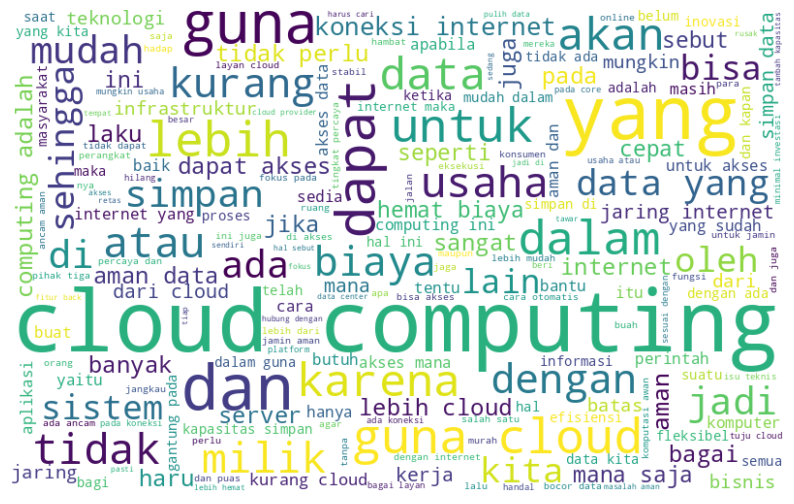

In [ ]:
pertanyaan_2 = ' '.join([word for sublist in data_preprocess['Jawaban Pertanyaan 2_tokenized_lemmed'] for word in sublist])
create_word_cloud(pertanyaan_2)

In [ ]:
pertanyaan_3 = ' '.join([word for sublist in data_preprocess['Jawaban Pertanyaan 3_tokenized_lemmed'] for word in sublist])
create_word_cloud(pertanyaan_3)

In [ ]:
pertanyaan_4 = ' '.join([word for sublist in data_preprocess['Jawaban Pertanyaan 4_tokenized_lemmed'] for word in sublist])
create_word_cloud(pertanyaan_4)

In [ ]:
pertanyaan_5 = ' '.join([word for sublist in data_preprocess['Jawaban Pertanyaan 1_tokenized_lemmed'] for word in sublist])
create_word_cloud(pertanyaan_5)

#Word Embedding

In [ ]:
!pip install transformers
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from transformers import BertTokenizer, BertModel

##IndoLEM(Base)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")
model = AutoModel.from_pretrained("indolem/indobert-base-uncased")

In [ ]:
def generate_embeddings(tokens):
    input_ids = torch.tensor(tokens).unsqueeze(0)
    with torch.no_grad():
        outputs = model(input_ids=input_ids)
        last_hidden_state = outputs.last_hidden_state
        embeddings = torch.mean(last_hidden_state, dim=1)
    return embeddings.numpy()

data_embeddings = pd.DataFrame()
for col in ['Jawaban Pertanyaan 1', 'Jawaban Pertanyaan 2', 'Jawaban Pertanyaan 3', 'Jawaban Pertanyaan 4', 'Jawaban Pertanyaan 5']:
    data_preprocess[col + '_tokens'] = data_preprocess[col].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
    data_embeddings[col + '_indolemembeddings'] = data_preprocess[col + '_tokens'].apply(generate_embeddings)

# Menampilkan DataFrame hasil embeddings
data_preprocess

,Jawaban Pertanyaan 1,Jawaban Pertanyaan 2,Jawaban Pertanyaan 3,Jawaban Pertanyaan 4,Jawaban Pertanyaan 5,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5,...,Jawaban Pertanyaan 1_tokenized_lemmed,Jawaban Pertanyaan 2_tokenized_lemmed,Jawaban Pertanyaan 3_tokenized_lemmed,Jawaban Pertanyaan 4_tokenized_lemmed,Jawaban Pertanyaan 5_tokenized_lemmed,Jawaban Pertanyaan 1_tokens,Jawaban Pertanyaan 2_tokens,Jawaban Pertanyaan 3_tokens,Jawaban Pertanyaan 4_tokens,Jawaban Pertanyaan 5_tokens
0,dalam mengimplementasikan sebuah perubahan pad...,a kelebihan cloud computing mudah di akses dim...,keuntungan pemerintah dapat mendata seluruh ke...,big data adalah kumpulan data yang lebih besar...,infrastruktur big data merupakan teknologi yan...,16.0,30.0,5.0,10.0,10.0,...,"[dalam, implementasi, buah, ubah, pada, masyar...","[a, lebih, cloud, computing, mudah, di, akses,...","[untung, perintah, dapat, data, seluruh, giat,...","[big, data, adalah, kumpul, data, yang, lebih,...","[infrastruktur, big, data, rupa, teknologi, ya...","[3, 1558, 23522, 1750, 2985, 1560, 1956, 9915,...","[3, 43, 8153, 22527, 5241, 12160, 3069, 1485, ...","[3, 4994, 1990, 1708, 24302, 2313, 2722, 31869...","[3, 9287, 3145, 1581, 6298, 3145, 1497, 1716, ...","[3, 8348, 9287, 3145, 1709, 3279, 1497, 4783, ..."
1,kendala kendala dalam mengimplementasikan sist...,kelebihan dan kekurangan menggunakan cloud com...,apa saja keuntungan untuk pemerintah dan pelak...,apakah yang dimaksud dengan teknologi big data...,menurut anda apa infrastruktur yang paling uta...,16.0,30.0,5.0,5.0,2.0,...,"[kendala, kendala, dalam, implementasi, sistem...","[lebih, dan, kurang, guna, cloud, computingkel...","[apa, saja, untung, untuk, perintah, dan, laku...","[apakah, yang, maksud, dengan, teknologi, big,...","[turut, anda, apa, infrastruktur, yang, paling...","[3, 9915, 9915, 1558, 23522, 2289, 2851, 1485,...","[3, 8153, 1501, 5902, 2216, 22527, 5241, 12160...","[3, 2064, 2037, 4994, 1559, 1990, 1501, 4275, ...","[3, 2811, 1497, 4317, 1545, 3279, 9287, 3145, ...","[3, 2008, 2045, 2064, 8348, 1497, 2323, 2408, ..."
2,kendala yang dihadapi pemerintah kota bandung ...,kelebihan cloud computing cloud bisa digunakan...,aplikasi sirkuit sistem informasi kewirausahaa...,teknologi big data adalah sistem pengaturan ma...,infrastruktur yang paling utama dalam implemen...,20.0,25.0,5.0,10.0,2.0,...,"[kendala, yang, hadap, perintah, kota, bandung...","[lebih, cloud, computing, cloud, bisa, guna, c...","[aplikasi, sirkuit, sistem, informasi, kewirau...","[teknologi, big, data, adalah, sistem, atur, m...","[infrastruktur, yang, paling, utama, dalam, im...","[3, 9915, 1497, 8051, 1990, 1850, 3576, 1581, ...","[3, 8153, 22527, 5241, 12160, 22527, 1777, 231...","[3, 5952, 13621, 2289, 2851, 22772, 31869, 170...","[3, 3279, 9287, 3145, 1581, 2289, 9167, 27668,...","[3, 8348, 1497, 2323, 2408, 1558, 11611, 9287,..."
3,menurut saya kendala kendala dalam mengimplem...,kelebihan cloud computing ialah kapasitas pen...,keuntungan bagi pemerintah ialah menjadikan k...,big data ialah sekumpulan data yang besar yan...,high performance computing cluster hpcc ialah...,20.0,25.0,10.0,10.0,10.0,...,"[turut, saya, kendala, kendala, dalam, impleme...","[lebih, cloud, computing, ialah, kapasitas, gu...","[untung, bagi, perintah, ialah, jadi, kota, ba...","[big, data, ialah, kumpul, data, yang, besar, ...","[high, performance, computing, cluster, hpcc, ...","[3, 2008, 1731, 9915, 9915, 1558, 23522, 2289,...","[3, 8153, 22527, 5241, 12160, 3541, 6368, 3625...","[3, 4994, 1896, 1990, 3541, 4429, 1850, 1624, ...","[3, 9287, 3145, 3541, 16554, 3145, 1497, 1819,...","[3, 8863, 16942, 5241, 12160, 23022, 11082, 88..."
4,menurut saya kendala kendala dalam mengimpleme...,kelebihan dapat diakses dari mana saja dan kap...,keuntungan untuk pemerintah kota pertumbuhan p...,teknologi big data merupakan sebuah teknologi ...,menurut saya infrastruktur yang paling utama d...,20.0,25.0,10.0,10.0,10.0,...,"[turut, saya, kendala, kendala

In [ ]:
data_embeddings['Jawaban Pertanyaan 1_indolemembeddings'].shape

(122,)

##INDOBERT (Base)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('indobenchmark/indobert-base-p2')
model = AutoModel.from_pretrained('indobenchmark/indobert-base-p2')

def generate_embeddings(tokens):
    input_ids = torch.tensor(tokens).unsqueeze(0)
    with torch.no_grad():
        outputs = model(input_ids=input_ids)
        last_hidden_state = outputs.last_hidden_state
        embeddings = torch.mean(last_hidden_state, dim=1)
    return embeddings.numpy()

for col in ['Jawaban Pertanyaan 1', 'Jawaban Pertanyaan 2', 'Jawaban Pertanyaan 3', 'Jawaban Pertanyaan 4', 'Jawaban Pertanyaan 5']:
  data_embeddings[col + '_baseembeddings'] = data_preprocess[col + '_tokens'].apply(generate_embeddings)

# Menampilkan DataFrame hasil embeddings
data_embeddings


,Jawaban Pertanyaan 1_indolemembeddings,Jawaban Pertanyaan 2_indolemembeddings,Jawaban Pertanyaan 3_indolemembeddings,Jawaban Pertanyaan 4_indolemembeddings,Jawaban Pertanyaan 5_indolemembeddings,Jawaban Pertanyaan 1_baseembeddings,Jawaban Pertanyaan 2_baseembeddings,Jawaban Pertanyaan 3_baseembeddings,Jawaban Pertanyaan 4_baseembeddings,Jawaban Pertanyaan 5_baseembeddings
0,"[[0.5420107, -0.27403152, -0.96718186, 0.30047...","[[-0.14742711, -0.54805857, -0.598586, 0.28044...","[[0.50872415, 0.07741439, -0.9671274, 1.000469...","[[0.8083589, -0.2841767, -1.1252584, 0.2083535...","[[0.12977839, -0.26195624, -0.77654797, 0.2524...","[[-0.7719942, 1.596018, 0.19731365, 0.7743206,...","[[-0.7852502, 1.814462, -0.29509407, 0.6520456...","[[-0.76584107, 1.5412151, -0.029600006, 1.4660...","[[-0.5132696, 1.607622, -0.14489654, 0.9563163...","[[-0.3625454, 1.4312072, -0.040263705, 0.83585..."
1,"[[-0.46711764, -0.5733486, -0.48800576, 0.7445...","[[0.052377935, -0.5394477, -1.1064327, 0.18940...","[[-0.077134006, 0.095369615, -0.9293675, 0.323...","[[0.22372077, -0.39918658, -0.76919484, 0.1839...","[[-0.11005443, -0.5149999, -0.5487922, 0.42266...","[[-0.34981453, 1.6720909, 0.31108922, 0.667558...","[[-0.69738746, 1.476883, -0.062101178, 0.97106...","[[-0.79499394, 1.1081947, 0.06759113, 0.874598...","[[-0.7758738, 1.6733077, -0.26948318, 0.785842...","[[-0.6639557, 1.0344726, -0.034103338, 0.34832..."
2,"[[0.058401212, -0.43701977, -0.56308866, 0.973...","[[0.617055, -0.81606275, -0.77910763, 0.915438...","[[0.3744195, -0.6634121, -0.7221732, 1.0787599...","[[0.6300658, -0.010411708, -0.69732076, 0.4563...","[[0.8050716, 0.25707826, -0.64230555, 0.746913...","[[-0.5763208, 1.7494717, 0.1312122, 0.72023445...","[[-0.81301624, 1.6546777, -0.08939274, 1.49601...","[[-0.81483996, 1.5258133, 0.10051542, 0.841048...","[[-0.18440543, 1.6940315, 0.10119529, 0.831943...","[[-0.61802304, 1.3404804, -0.2831633, 1.044582..."
3,"[[-0.1522172, -0.6513674, -1.1565846, 0.941987...","[[0.62110335, -0.2001529, -0.5934786, 0.203599...","[[0.14616573, -0.7334464, -0.7069159, 0.772013...","[[0.46171027, -0.51824373, -0.5961087, 0.19868...","[[0.31287017, -0.083624594, -0.7021603, 0.5017...","[[-0.5367188, 1.6478065, 0.123242304, 1.297021...","[[-0.77959764, 1.2284468, -0.17997038, 1.11481...","[[-0.768411, 1.3001436, -0.3865022, 1.001493, ...","[[-0.25106648, 1.6163868, -0.013149037, 1.1734...","[[-0.98652905, 1.1942706, -0.011123768, 1.2754..."
4,"[[0.007835418, -0.5562184, -0.55642027, 0.9274...","[[0.0845522, -0.32324973, -0.5101578, 0.589538...","[[0.43589845, 0.28845552, -0.92932534, 0.17808...","[[0.2867609, -0.35611758, -0.890953, 0.7214173...","[[0.4037314, -0.46936303, -0.6519338, 0.249979...","[[-0.71826005, 1.4549284, 0.10200324, 0.996408...","[[-0.80764174, 2.066627, -0.08562181, 1.093705...","[[-0.67371047, 1.3268287, 0.09755571, 0.938268...","[[-0.8047227, 1.9635489, -0.33145085, 0.585565...","[[-0.62007153, 1.649499, 0.36304638, 0.4451442..."
...,...,...,...,...,...,...,...,...,...,...
117,"[[-0.24120302, -0.62465703, -0.65603167, 0.437...","[[0.12004346, -0.18761371, -0.9231626, 0.35558...","[[0.32910052, -0.17135777, -0.5560408, 0.07846...","[[0.07416531, -0.58874655, -0.76554674, 0.1544...","[[0.6639581, -0.22943129, -0.6488435, 0.265910...","[[-1.0356472, 1.9139267, 0.0703964, 0.85603726...","[[-0.9713086, 1.6130288, 0.029248782, 1.340472...","[[-0.57347053, 1.8196789, -0.0781939, 0.597153...","[[-0.9779607, 2.157972, -0.20965396, 0.9014911...","[[-0.34268507, 1.2548926, 0.458961, 0.32046458..."
118,"[[-0.39375538, -0.47436488, -0.32418403, 1.208...","[[0.0812867, -0.502927, -1.0316193, 0.7322944,...","[[0.22358721, -0.63753843, -0.8826753, 0.74767...","[[0.6224079, -0.32474625, -0.89532006, 0.19902...","[[0.019760119, -0.039028235, -0.6807605, 0.600...","[[-0.44264165, 1.7526615, 0.10784486, 0.637179...","[[-1.1059349, 1.6173998, -0.2614985, 0.8924701...","[[-0.3006865, 1.3862468, 0.08550983, 1.2128805...","[[-1.1293521, 1.7437863, 

In [ ]:
data_embeddings.shape

(122, 10)

In [ ]:
data_embeddings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Jawaban Pertanyaan 1_indolemembeddings  122 non-null    object
 1   Jawaban Pertanyaan 2_indolemembeddings  122 non-null    object
 2   Jawaban Pertanyaan 3_indolemembeddings  122 non-null    object
 3   Jawaban Pertanyaan 4_indolemembeddings  122 non-null    object
 4   Jawaban Pertanyaan 5_indolemembeddings  122 non-null    object
 5   Jawaban Pertanyaan 1_baseembeddings     122 non-null    object
 6   Jawaban Pertanyaan 2_baseembeddings     122 non-null    object
 7   Jawaban Pertanyaan 3_baseembeddings     122 non-null    object
 8   Jawaban Pertanyaan 4_baseembeddings     122 non-null    object
 9   Jawaban Pertanyaan 5_baseembeddings     122 non-null    object
dtypes: object(10)
memory usage: 10.5+ KB


##IndoBERT(large)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('indobenchmark/indobert-large-p2')
model = AutoModel.from_pretrained('indobenchmark/indobert-large-p2')

def generate_embeddings(tokens):
    input_ids = torch.tensor(tokens).unsqueeze(0)
    with torch.no_grad():
        outputs = model(input_ids=input_ids)
        last_hidden_state = outputs.last_hidden_state
        embeddings = torch.mean(last_hidden_state, dim=1)
    return embeddings.numpy()

for col in ['Jawaban Pertanyaan 1', 'Jawaban Pertanyaan 2', 'Jawaban Pertanyaan 3', 'Jawaban Pertanyaan 4', 'Jawaban Pertanyaan 5']:
  data_preprocess[col + '_tokens'] = data_preprocess[col].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
  data_embeddings[col + '_largeembeddings'] = data_preprocess[col + '_tokens'].apply(generate_embeddings)

# Menampilkan DataFrame hasil embeddings
data_embeddings


In [94]:
data_embeddings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Jawaban Pertanyaan 1_indolemembeddings  122 non-null    object
 1   Jawaban Pertanyaan 2_indolemembeddings  122 non-null    object
 2   Jawaban Pertanyaan 3_indolemembeddings  122 non-null    object
 3   Jawaban Pertanyaan 4_indolemembeddings  122 non-null    object
 4   Jawaban Pertanyaan 5_indolemembeddings  122 non-null    object
 5   Jawaban Pertanyaan 1_baseembeddings     122 non-null    object
 6   Jawaban Pertanyaan 2_baseembeddings     122 non-null    object
 7   Jawaban Pertanyaan 3_baseembeddings     122 non-null    object
 8   Jawaban Pertanyaan 4_baseembeddings     122 non-null    object
 9   Jawaban Pertanyaan 5_baseembeddings     122 non-null    object
 10  Jawaban Pertanyaan 1_largeembeddings    122 non-null    object
 11  Jawaba

In [95]:
data_embeddings[['Jawaban Pertanyaan 1_largeembeddings','Jawaban Pertanyaan 2_largeembeddings','Jawaban Pertanyaan 3_largeembeddings',
                 'Jawaban Pertanyaan 4_largeembeddings','Jawaban Pertanyaan 5_largeembeddings']].shape

(122, 5)

#Save Joblib

In [96]:
joblib.dump(data_preprocess, "done_preprocess.joblib")
print(f"DataFrame berhasil disimpan dengan nama done_preprocess.joblib")
joblib.dump(data_embeddings, "word_embedding.joblib")
print(f"DataFrame berhasil disimpan dengan nama word_embedding.joblib")
joblib.dump(data_target_3_rentang, "data_label3.joblib")
print(f"DataFrame berhasil disimpan dengan nama data_label3.joblib")
joblib.dump(data_target_5_rentang, "data_label5.joblib")
print(f"DataFrame berhasil disimpan dengan nama data_label5.joblib")

DataFrame berhasil disimpan dengan nama done_preprocess.joblib
DataFrame berhasil disimpan dengan nama word_embedding.joblib
DataFrame berhasil disimpan dengan nama data_label3.joblib
DataFrame berhasil disimpan dengan nama data_label5.joblib


#Load Joblib

In [97]:
# Muat kembali DataFrame dari file joblib
data_preprocess = joblib.load("done_preprocess.joblib")
# data_embeddings = joblib.load("word_embedding.joblib")
data_target_3_rentang = joblib.load("data_label3.joblib")
data_target_5_rentang = joblib.load("data_label5.joblib")

In [98]:
data_target_5_rentang

,Nilai No 1,Nilai No 2,Nilai No 3,Nilai No 4,Nilai No 5
0,0,1,0,0,0
1,0,1,0,1,1
2,2,1,0,0,1
3,2,1,2,0,0
4,2,1,2,0,0
...,...,...,...,...,...
117,2,1,2,0,1
118,2,0,2,0,1
119,0,1,2,1,0
120,1,1,2,1,1


In [99]:
data_embeddings

,Jawaban Pertanyaan 1_indolemembeddings,Jawaban Pertanyaan 2_indolemembeddings,Jawaban Pertanyaan 3_indolemembeddings,Jawaban Pertanyaan 4_indolemembeddings,Jawaban Pertanyaan 5_indolemembeddings,Jawaban Pertanyaan 1_baseembeddings,Jawaban Pertanyaan 2_baseembeddings,Jawaban Pertanyaan 3_baseembeddings,Jawaban Pertanyaan 4_baseembeddings,Jawaban Pertanyaan 5_baseembeddings,Jawaban Pertanyaan 1_largeembeddings,Jawaban Pertanyaan 2_largeembeddings,Jawaban Pertanyaan 3_largeembeddings,Jawaban Pertanyaan 4_largeembeddings,Jawaban Pertanyaan 5_largeembeddings
0,"[[0.5420107, -0.27403152, -0.96718186, 0.30047...","[[-0.14742711, -0.54805857, -0.598586, 0.28044...","[[0.50872415, 0.07741439, -0.9671274, 1.000469...","[[0.8083589, -0.2841767, -1.1252584, 0.2083535...","[[0.12977839, -0.26195624, -0.77654797, 0.2524...","[[-0.7719942, 1.596018, 0.19731365, 0.7743206,...","[[-0.7852502, 1.814462, -0.29509407, 0.6520456...","[[-0.76584107, 1.5412151, -0.029600006, 1.4660...","[[-0.5132696, 1.607622, -0.14489654, 0.9563163...","[[-0.3625454, 1.4312072, -0.040263705, 0.83585...","[[-0.6994786, 0.20190716, -0.10847198, -0.5031...","[[0.033213273, 0.85152644, -0.029077668, 0.307...","[[-0.579505, 0.63541704, -0.60755396, -0.30895...","[[-0.4137796, 0.5639138, -0.24299102, -0.57869...","[[-0.49219713, 0.69151145, -0.43195572, 0.0900..."
1,"[[-0.46711764, -0.5733486, -0.48800576, 0.7445...","[[0.052377935, -0.5394477, -1.1064327, 0.18940...","[[-0.077134006, 0.095369615, -0.9293675, 0.323...","[[0.22372077, -0.39918658, -0.76919484, 0.1839...","[[-0.11005443, -0.5149999, -0.5487922, 0.42266...","[[-0.34981453, 1.6720909, 0.31108922, 0.667558...","[[-0.69738746, 1.476883, -0.062101178, 0.97106...","[[-0.79499394, 1.1081947, 0.06759113, 0.874598...","[[-0.7758738, 1.6733077, -0.26948318, 0.785842...","[[-0.6639557, 1.0344726, -0.034103338, 0.34832...","[[-0.36514795, 0.45632723, -0.42656174, -0.564...","[[-0.10327932, 0.6523498, -0.5397934, -0.31371...","[[-0.4641272, 0.55102676, -0.5945272, -0.50795...","[[-0.32438195, 0.74828434, -0.30098167, -0.305...","[[-0.501884, 0.7942221, -0.43804377, -0.586925..."
2,"[[0.058401212, -0.43701977, -0.56308866, 0.973...","[[0.617055, -0.81606275, -0.77910763, 0.915438...","[[0.3744195, -0.6634121, -0.7221732, 1.0787599...","[[0.6300658, -0.010411708, -0.69732076, 0.4563...","[[0.8050716, 0.25707826, -0.64230555, 0.746913...","[[-0.5763208, 1.7494717, 0.1312122, 0.72023445...","[[-0.81301624, 1.6546777, -0.08939274, 1.49601...","[[-0.81483996, 1.5258133, 0.10051542, 0.841048...","[[-0.18440543, 1.6940315, 0.10119529, 0.831943...","[[-0.61802304, 1.3404804, -0.2831633, 1.044582...","[[-0.38117495, 0.5482585, -0.49092674, -0.4591...","[[0.07979641, 0.36221305, -0.48819402, -0.1740...","[[-0.5114332, 0.66049135, -0.37334812, -0.3869...","[[-0.4727542, 0.5945606, -0.55292463, -0.30427...","[[-0.14719619, 0.88879853, -0.35438615, -0.164..."
3,"[[-0.1522172, -0.6513674, -1.1565846, 0.941987...","[[0.62110335, -0.2001529, -0.5934786, 0.203599...","[[0.14616573, -0.7334464, -0.7069159, 0.772013...","[[0.46171027, -0.51824373, -0.5961087, 0.19868...","[[0.31287017, -0.083624594, -0.7021603, 0.5017...","[[-0.5367188, 1.6478065, 0.123242304, 1.297021...","[[-0.77959764, 1.2284468, -0.17997038, 1.11481...","[[-0.768411, 1.3001436, -0.3865022, 1.001493, ...","[[-0.25106648, 1.6163868, -0.013149037, 1.1734...","[[-0.98652905, 1.1942706, -0.011123768, 1.2754...","[[-0.10758538, 0.2892986, -0.19756915, -0.6978...","[[1.06310845e-05, 0.37243584, -0.17243844, -0....","[[-0.30261233, 0.2457801, -0.5050317, -0.36435...","[[-0.5869286, -0.11611731, -0.2749736, -0.5570...","[[-0.06860747, 0.33900112, -0.52906764, 0.1937..."
4,"[[0.007835418, -0.5562184, -0.55642027, 0.9274...","[[0.0845522, -0.32324973, -0.5101578, 0.589538...","[[0.43589845, 0.28845552, -0.92932534, 0.17808...","[[0.2867609, -0.35611758, -0.890953, 0.7214173...","[[0.4037314, -0.46936303, -0.6519338, 0.249979...","[[-0.71826005, 1.4549284, 0.10200324, 0.996408..

#PEMODELAN


##LTSM

###IMPORT LIBRARY

In [100]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional,LSTM, Dense, Dropout,LeakyReLU, GlobalAveragePooling1D, GRU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2, l1
from imblearn.over_sampling import SMOTE
!pip install scikit-optimize
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import compute_class_weight

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.1 MB/s eta 0:00:00


In [101]:
!pip install keras
!pip install tensorflow

###Bayesian

In [102]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.regularizers import l1, l2
import numpy as np

def create_lstm_model(input_shape, lstm_units, dense_units, dropout_rate):
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(input_shape[1], input_shape[2]), return_sequences=True))
    model.add(GlobalAveragePooling1D(input_shape=(input_shape[1], input_shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(np.unique(y)), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
    return model

# Objective function for Bayesian Search
def objective_function(params):
    lstm_units = int(params[0])
    dense_units = int(params[1])
    dropout_rate = params[2]

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights_dict = {i: class_weights[i] for i in range(len(np.unique(y_train)))}

    model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]),
                              lstm_units=lstm_units, dense_units=dense_units, dropout_rate=dropout_rate)

    model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0, class_weight=class_weights_dict)

    score = model.evaluate(X_val, y_val, verbose=0)

    return -score[1]

# Data fitur dan target

y = data_target_3_rentang["Nilai No 1"].values
panjang_sekuens = len(X[0])
X = pad_sequences(data_embeddings["Jawaban Pertanyaan 1_indolemembeddings"], padding='post', maxlen=panjang_sekuens)

# Define the search space for hyperparameters
space = [
    Integer(64, 256, name='lstm_units'),         # Jumlah unit LSTM (dalam range 64 hingga 256)
    Integer(32, 128, name='dense_units'),        # Jumlah unit dense layer (dalam range 32 hingga 128)
    Real(0.1, 0.5, prior='uniform', name='dropout_rate')    # Tingkat dropout (dalam range 0.1 hingga 0.5)
]

# Run Bayesian Search to find the optimal hyperparameters
result = gp_minimize(objective_function, space, n_calls=20, random_state=42)

# Get the optimal hyperparameters and best accuracy
optimal_params = {
    'lstm_units': int(result.x[0]),
    'dense_units': int(result.x[1]),
    'dropout_rate': result.x[2]
}
best_accuracy = result.fun

print("Hyperparameter Optimal:")
print(optimal_params)
print("Akurasi Terbaik:", best_accuracy)


NameError: ignored

In [ ]:
X_train

In [ ]:

def create_lstm_model(input_shape):
  model = Sequential()
  model.add(LSTM(lstm_units, input_shape=(input_shape[1], input_shape[2]), return_sequences=True))
  model.add(GlobalAveragePooling1D(input_shape=(input_shape[1], input_shape[2])))
  model.add(Dropout(dropout_rate))
  model.add(Dense(dense_units, activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(len(np.unique(y)), activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
  return model

# Data fitur dan target
column = f"Jawaban Pertanyaan 1_indolemembeddings"
X = data_embeddings[column].values
target = f"Nilai No 1"
y = data_target_3_rentang[target].values
panjang_sekuens = len(X[0])
# Padding data fitur
X = pad_sequences(X, padding='post', maxlen=panjang_sekuens)



  # Lakukan cross-validation
  for train_index, test_index in kfold.split(X, y):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]

    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights_dict = {i: class_weights[i] for i in range(len(np.unique(y_train)))}

    model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), verbose=0, class_weight=class_weights_dict)

    score = model.evaluate(X_val, y_val)
    scores.append(score[1])  # Ambil akurasi dari hasil evaluasi
    histories.append(history)

  # Cetak rata-rata akurasi dan standar deviasi dari cross-validation
  print("Cross-Validation Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(scores) * 100, np.std(scores) * 100))

  # Visualisasi loss pada set pelatihan dan validasi rata-rata dari semua fold
  avg_train_loss = np.mean([history.history['loss'] for history in histories], axis=0)
  avg_val_loss = np.mean([history.history['val_loss'] for history in histories], axis=0)
  plt.plot(avg_train_loss, label='Average Training Loss')
  plt.plot(avg_val_loss, label='Average Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Visualisasi akurasi pada set pelatihan dan validasi rata-rata dari semua fold
  avg_train_accuracy = np.mean([history.history['accuracy'] for history in histories], axis=0)
  avg_val_accuracy = np.mean([history.history['val_accuracy'] for history in histories], axis=0)
  plt.plot(avg_train_accuracy, label='Average Training Accuracy')
  plt.plot(avg_val_accuracy, label='Average Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [ ]:
nilai['Nilai No 1'].value_counts()

In [ ]:
dataset_powtrans['Nilai No 2'].value_counts()

In [ ]:
dataset['Nilai No 3'].value_counts()

In [ ]:
dataset['Nilai No 4'].value_counts()

In [ ]:
dataset['Nilai No 5'].value_counts()

In [ ]:
nilai['Nilai No 2']

###BERT(base)

####3 Rentang

In [381]:
def crossval_3fitur_base(nomor,Pooling,batch):
# Fungsi untuk membuat model LSTM
  def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    if(Pooling=="AVG"):
      model.add(GlobalAveragePooling1D(input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(EFB_dataset_target_3_label[target].unique()), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
    return model

  # Data fitur dan target
  column = f"Jawaban Pertanyaan {nomor}_baseembeddings"
  X = data_embeddings[column].values
  target = f"Nilai No {nomor}"
  y = EFB_dataset_target_3_label[target].values
  panjang_sekuens = len(X[0])
  # Padding data fitur
  X = pad_sequences(X, padding='post', maxlen=panjang_sekuens)

  # Inisialisasi StratifiedKFold dengan jumlah fold yang diinginkan (misalnya 5)
  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  # Inisialisasi list untuk menyimpan akurasi pada setiap fold
  scores = []

  # Inisialisasi list untuk menyimpan history dari setiap fold
  histories = []

  # Lakukan cross-validation
  for train_index, test_index in kfold.split(X, y):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]

    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights_dict = {i: class_weights[i] for i in range(len(np.unique(y_train)))}

    model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    history = model.fit(X_train, y_train, epochs=100, batch_size=batch, validation_data=(X_val, y_val), verbose=0, class_weight=class_weights_dict)

    score = model.evaluate(X_val, y_val)
    scores.append(score[1])  # Ambil akurasi dari hasil evaluasi
    histories.append(history)

  # Cetak rata-rata akurasi dan standar deviasi dari cross-validation
  print("Cross-Validation Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(scores) * 100, np.std(scores) * 100))

  # Visualisasi loss pada set pelatihan dan validasi rata-rata dari semua fold
  avg_train_loss = np.mean([history.history['loss'] for history in histories], axis=0)
  avg_val_loss = np.mean([history.history['val_loss'] for history in histories], axis=0)
  plt.plot(avg_train_loss, label='Average Training Loss')
  plt.plot(avg_val_loss, label='Average Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Visualisasi akurasi pada set pelatihan dan validasi rata-rata dari semua fold
  avg_train_accuracy = np.mean([history.history['accuracy'] for history in histories], axis=0)
  avg_val_accuracy = np.mean([history.history['val_accuracy'] for history in histories], axis=0)
  plt.plot(avg_train_accuracy, label='Average Training Accuracy')
  plt.plot(avg_val_accuracy, label='Average Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

1/1 [==============================] - 0s 38ms/step - loss: 0.9567 - accuracy: 0.6250
Cross-Validation Accuracy: 64.63% (+/- 8.52%)


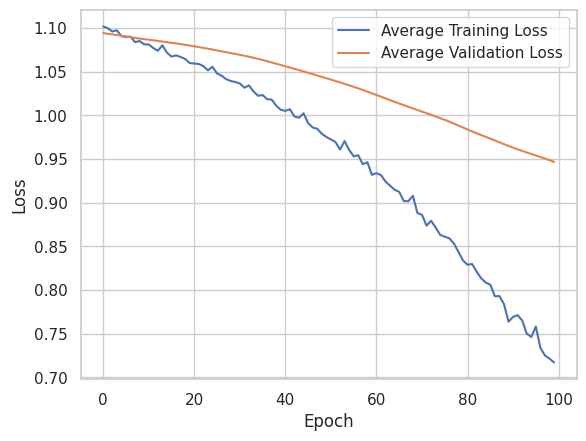

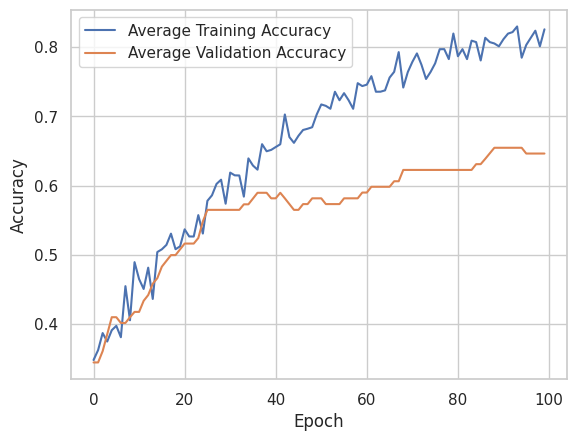

Epoch 1/100
4/4 [==============================] - 3s 16ms/step - loss: 1.0683 - accuracy: 0.5217
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 1.0480 - accuracy: 0.5652
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 1.0283 - accuracy: 0.5882
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0127 - accuracy: 0.5934
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.9939 - accuracy: 0.5934
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 0.9841 - accuracy: 0.5985
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.9632 - accuracy: 0.5882
Epoch 8/100
4/4 [==============================] - 0s 15ms/step - loss: 0.9522 - accuracy: 0.5882
Epoch 9/100
4/4 [==============================] - 0s 24ms/step - loss: 0.9362 - accuracy: 0.6138
Epoch 10/100
4/4 [==============================] - 0s 17ms/step - loss: 0.9342 - accuracy: 0.5882
Epoch 11/100
4/4 [=

In [382]:
crossval_3fitur_base(1,"AVG",128)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.7125 - accuracy: 0.8041 - val_loss: 0.6564 - val_accuracy: 0.8800
Epoch 2/100
1/1 [==============================] - 0s 148ms/step - loss: 0.7077 - accuracy: 0.8351 - val_loss: 0.6561 - val_accuracy: 0.8800
Epoch 3/100
1/1 [==============================] - 0s 106ms/step - loss: 0.7068 - accuracy: 0.7938 - val_loss: 0.6555 - val_accuracy: 0.8800
Epoch 4/100
1/1 [==============================] - 0s 120ms/step - loss: 0.7013 - accuracy: 0.8247 - val_loss: 0.6551 - val_accuracy: 0.8800
Epoch 5/100
1/1 [==============================] - 0s 99ms/step - loss: 0.7107 - accuracy: 0.8454 - val_loss: 0.6555 - val_accuracy: 0.8800
Epoch 6/100
1/1 [==============================] - 0s 89ms/step - loss: 0.6994 - accuracy: 0.8454 - val_loss: 0.6557 - val_accuracy: 0.8800
Epoch 7/100
1/1 [==============================] - 0s 95ms/step - loss: 0.6982 - accuracy: 0.8144 - val_loss: 0.6557 - val_accuracy: 0.8800
Epoch 8/100
1/1 [==

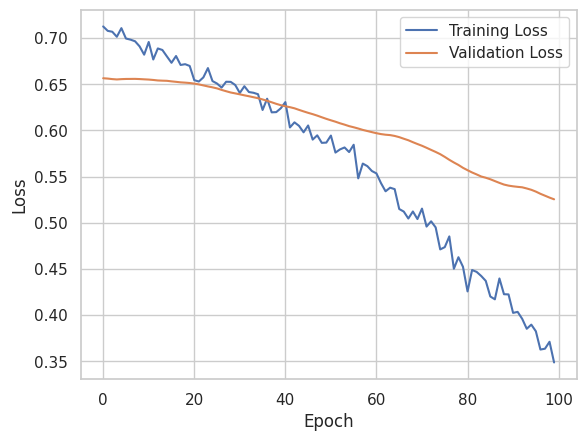

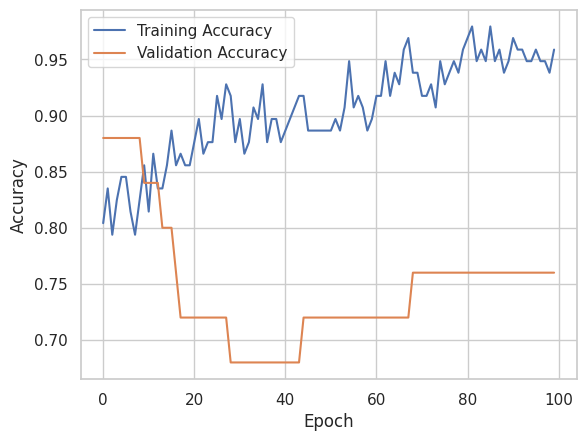

In [348]:
tiga_fitur_base(2,"AVG",128)

1/1 [==============================] - 0s 42ms/step - loss: 0.5269 - accuracy: 0.8333
Cross-Validation Accuracy: 84.43% (+/- 1.56%)


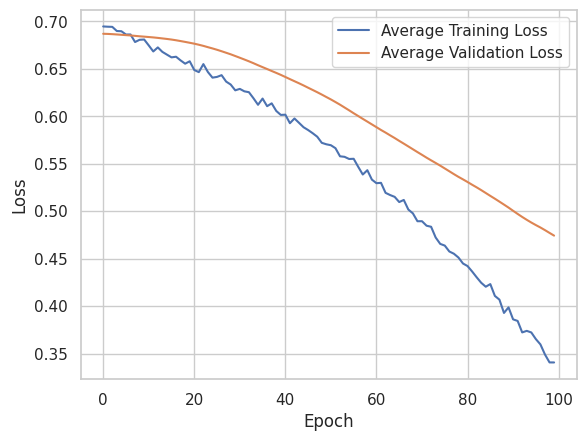

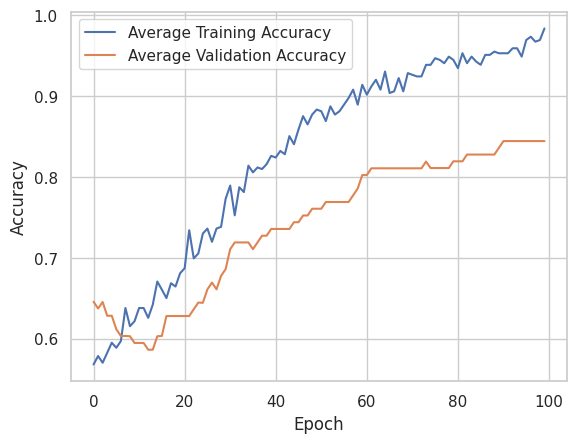

In [331]:
crossval_3fitur_base(2,"AVG",128)

In [ ]:
crossval_3fitur_base(3,"AVG",128)


####5 Rentang

In [ ]:
def crossval_5fitur_base(nomor,Pooling,batch):
# Fungsi untuk membuat model LSTM
  def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    if(Pooling=="AVG"):
      model.add(GlobalAveragePooling1D(input_shape=(X_train.shape[1], X_train.shape[2])))
    else:
      model.add(GlobalMaxPooling1D(input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu',kernel_regularizer=l1(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu',kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(len(data_target_5_rentang[target].unique()), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
    return model

  # Data fitur dan target
  column = f"Jawaban Pertanyaan {nomor}_baseembeddings"
  X = data_embeddings[column].values
  target = f"Nilai No {nomor}"
  y = data_target_5_rentang[target].values
  panjang_sekuens = len(X[0])
  # Padding data fitur
  X = pad_sequences(X, padding='post', maxlen=panjang_sekuens)

  # Inisialisasi StratifiedKFold dengan jumlah fold yang diinginkan (misalnya 5)
  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  # Inisialisasi list untuk menyimpan akurasi pada setiap fold
  scores = []

  # Inisialisasi list untuk menyimpan history dari setiap fold
  histories = []

  # Lakukan cross-validation
  for train_index, test_index in kfold.split(X, y):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]

    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights_dict = {i: class_weights[i] for i in range(len(np.unique(y_train)))}

    model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    history = model.fit(X_train, y_train, epochs=100, batch_size=batch, validation_data=(X_val, y_val), verbose=0, class_weight=class_weights_dict)

    score = model.evaluate(X_val, y_val)
    scores.append(score[1])  # Ambil akurasi dari hasil evaluasi
    histories.append(history)

  # Cetak rata-rata akurasi dan standar deviasi dari cross-validation
  print("Cross-Validation Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(scores) * 100, np.std(scores) * 100))

  # Visualisasi loss pada set pelatihan dan validasi rata-rata dari semua fold
  avg_train_loss = np.mean([history.history['loss'] for history in histories], axis=0)
  avg_val_loss = np.mean([history.history['val_loss'] for history in histories], axis=0)
  plt.plot(avg_train_loss, label='Average Training Loss')
  plt.plot(avg_val_loss, label='Average Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Visualisasi akurasi pada set pelatihan dan validasi rata-rata dari semua fold
  avg_train_accuracy = np.mean([history.history['accuracy'] for history in histories], axis=0)
  avg_val_accuracy = np.mean([history.history['val_accuracy'] for history in histories], axis=0)
  plt.plot(avg_train_accuracy, label='Average Training Accuracy')
  plt.plot(avg_val_accuracy, label='Average Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [ ]:
data_target_3_rentang['Nilai No 1'].value_counts()

In [ ]:
crossval_5fitur_base(1,"AVG",128)

In [ ]:
crossval_5fitur_base(2,"AVG",128)

In [ ]:
crossval_5fitur_base(2,"AVG",128)

In [ ]:
crossval_5fitur_base(3,"AVG",128)

In [ ]:
crossval_5fitur_base(2,"AVG",64)

In [ ]:
crossval_5fitur_base(3)

In [ ]:
crossval_5fitur_base(3)

###IndoBERT(large)


####3 Rentang

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import GlobalMaxPooling1D
from sklearn.utils.class_weight import compute_class_weight

def crossval_3_fitur_large(nomor):
# Fungsi untuk membuat model LSTM
  def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(GlobalAveragePooling1D(input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu',kernel_regularizer=l1(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu',kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(len(data_target_3_rentang[target].unique()), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
    return model

  # Data fitur dan target
  column = f"Jawaban Pertanyaan {nomor}_largeembeddings"
  X = data_embeddings[column].values
  target = f"Nilai No {nomor}"
  y = data_target_3_rentang[target].values
  panjang_sekuens = len(X[0])
  # Padding data fitur
  X = pad_sequences(X, padding='post', maxlen=panjang_sekuens)

  # Inisialisasi StratifiedKFold dengan jumlah fold yang diinginkan (misalnya 5)
  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  # Inisialisasi list untuk menyimpan akurasi pada setiap fold
  scores = []

  # Inisialisasi list untuk menyimpan history dari setiap fold
  histories = []

  # Lakukan cross-validation
  for train_index, test_index in kfold.split(X, y):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]

    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights_dict = {i: class_weights[i] for i in range(len(np.unique(y_train)))}

    model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), verbose=0, class_weight=class_weights_dict)

    score = model.evaluate(X_val, y_val)
    scores.append(score[1])  # Ambil akurasi dari hasil evaluasi
    histories.append(history)

  # Cetak rata-rata akurasi dan standar deviasi dari cross-validation
  print("Cross-Validation Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(scores) * 100, np.std(scores) * 100))

  # Visualisasi loss pada set pelatihan dan validasi rata-rata dari semua fold
  avg_train_loss = np.mean([history.history['loss'] for history in histories], axis=0)
  avg_val_loss = np.mean([history.history['val_loss'] for history in histories], axis=0)
  plt.plot(avg_train_loss, label='Average Training Loss')
  plt.plot(avg_val_loss, label='Average Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Visualisasi akurasi pada set pelatihan dan validasi rata-rata dari semua fold
  avg_train_accuracy = np.mean([history.history['accuracy'] for history in histories], axis=0)
  avg_val_accuracy = np.mean([history.history['val_accuracy'] for history in histories], axis=0)
  plt.plot(avg_train_accuracy, label='Average Training Accuracy')
  plt.plot(avg_val_accuracy, label='Average Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [ ]:
crossval_3_fitur_large(1)

In [ ]:
crossval_3_fitur_large(1)

In [ ]:
crossval_3_fitur_large(2)

In [ ]:
crossval_3_fitur_large(2)

In [ ]:
crossval_3_fitur_large(3)

#### 5 Rentang

In [ ]:
data_target_5_rentang['Nilai No 3'].value_counts()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import GlobalMaxPooling1D
from sklearn.utils.class_weight import compute_class_weight

def crossval_5fitur_large(nomor):
# Fungsi untuk membuat model LSTM
  def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(GlobalAveragePooling1D(input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu',kernel_regularizer=l1(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu',kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(len(data_target_5_rentang[target].unique()), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
    return model

  # Data fitur dan target
  column = f"Jawaban Pertanyaan {nomor}_largeembeddings"
  X = data_embeddings[column].values
  target = f"Nilai No {nomor}"
  y = data_target_5_rentang[target].values
  panjang_sekuens = len(X[0])
  # Padding data fitur
  X = pad_sequences(X, padding='post', maxlen=panjang_sekuens)

  # Inisialisasi StratifiedKFold dengan jumlah fold yang diinginkan (misalnya 5)
  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  # Inisialisasi list untuk menyimpan akurasi pada setiap fold
  scores = []

  # Inisialisasi list untuk menyimpan history dari setiap fold
  histories = []

  # Lakukan cross-validation
  for train_index, test_index in kfold.split(X, y):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]

    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights_dict = {i: class_weights[i] for i in range(len(np.unique(y_train)))}

    model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), verbose=0, class_weight=class_weights_dict)

    score = model.evaluate(X_val, y_val)
    scores.append(score[1])  # Ambil akurasi dari hasil evaluasi
    histories.append(history)

  # Cetak rata-rata akurasi dan standar deviasi dari cross-validation
  print("Cross-Validation Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(scores) * 100, np.std(scores) * 100))

  # Visualisasi loss pada set pelatihan dan validasi rata-rata dari semua fold
  avg_train_loss = np.mean([history.history['loss'] for history in histories], axis=0)
  avg_val_loss = np.mean([history.history['val_loss'] for history in histories], axis=0)
  plt.plot(avg_train_loss, label='Average Training Loss')
  plt.plot(avg_val_loss, label='Average Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Visualisasi akurasi pada set pelatihan dan validasi rata-rata dari semua fold
  avg_train_accuracy = np.mean([history.history['accuracy'] for history in histories], axis=0)
  avg_val_accuracy = np.mean([history.history['val_accuracy'] for history in histories], axis=0)
  plt.plot(avg_train_accuracy, label='Average Training Accuracy')
  plt.plot(avg_val_accuracy, label='Average Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [ ]:
crossval_5fitur_large(1)

In [ ]:
crossval_5fitur_large(1)

In [ ]:
crossval_5fitur_large(2)

In [ ]:
crossval_5fitur_large(3)

##SVM

###IndoBERT(Base)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Daftar nomor pertanyaan
daftar_nomor = ['1', '2', '3', '4', '5']  # Ganti dengan daftar nomor yang sesuai

# Inisialisasi dictionary untuk menyimpan hasil evaluasi setiap nomor
evaluasi_per_nomor = {}

# Looping untuk setiap nomor
for nomor in daftar_nomor:
    X = data_embeddings['Jawaban Pertanyaan ' + nomor + '_baseembeddings'].tolist()
    y = data_target_5_rentang['Nilai No ' + nomor]

    # Meratakan data embeddings menjadi dimensi 2
    X = np.array([np.mean(embedding, axis=0) for embedding in X])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Inisialisasi model SVM
    svm_model = SVC(random_state=42)

    # Tentukan grid parameter yang ingin diuji
    param_grid = {
        'C': [0.1, 1, 10],  # Parameter C (regularization parameter)
        'kernel': ['linear', 'rbf'],  # Jenis kernel (linear atau rbf)
        'gamma': ['scale', 'auto', 0.1, 0.01]  # Parameter gamma untuk kernel rbf
    }

    # Buat GridSearchCV untuk mencari kombinasi parameter terbaik
    grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

    # Latih model dengan grid search pada data pelatihan
    grid_search.fit(X_train, y_train)

    # Ambil model terbaik dari grid search
    best_svm_model = grid_search.best_estimator_

    # Lakukan prediksi pada data uji menggunakan model terbaik
    y_pred = best_svm_model.predict(X_test)

    # Evaluasi performa model dan simpan ke dictionary
    evaluasi = accuracy_score(y_test, y_pred) * 100
    evaluasi_per_nomor[nomor] = evaluasi



# Print hasil evaluasi untuk setiap nomor
for nomor, evaluasi in evaluasi_per_nomor.items():
    print(f"Informasi evaluasi untuk Nomor {nomor}:")
    print(f"dengan {best_svm_model.kernel},C {best_svm_model.C}, dan gamma {best_svm_model.gamma}:")
    print(f"Akurasi: {evaluasi:.2f}%")
    print()


###IndoBERT (Large)


In [ ]:
data_embeddings

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Daftar nomor pertanyaan
daftar_nomor = ['1', '2', '3', '4', '5']  # Ganti dengan daftar nomor yang sesuai

# Inisialisasi dictionary untuk menyimpan hasil evaluasi setiap nomor
evaluasi_per_nomor_IB = {}

# Looping untuk setiap nomor
for nomor in daftar_nomor:
    X = data_embeddings['Jawaban Pertanyaan ' + nomor + '_largeembeddings'].tolist()
    y = data_target_5_rentang['Nilai No ' + nomor]

    # Meratakan data embeddings menjadi dimensi 2
    X = np.array([np.mean(embedding, axis=0) for embedding in X])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Inisialisasi model SVM
    svm_model = SVC(random_state=42)

    # Tentukan grid parameter yang ingin diuji
    param_grid = {
        'C': [0.1, 1, 10],  # Parameter C (regularization parameter)
        'kernel': ['linear', 'rbf'],  # Jenis kernel (linear atau rbf)
        'gamma': ['scale', 'auto', 0.1, 0.01]  # Parameter gamma untuk kernel rbf
    }

    # Buat GridSearchCV untuk mencari kombinasi parameter terbaik
    grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

    # Latih model dengan grid search pada data pelatihan
    grid_search.fit(X_train, y_train)

    # Ambil model terbaik dari grid search
    best_svm_model = grid_search.best_estimator_

    # Lakukan prediksi pada data uji menggunakan model terbaik
    y_pred = best_svm_model.predict(X_test)

    # Evaluasi performa model dan simpan ke dictionary
    evaluasi = accuracy_score(y_test, y_pred) * 100
    evaluasi_per_nomor_IB[nomor] = evaluasi



# Print hasil evaluasi untuk setiap nomor
for nomor, evaluasi in evaluasi_per_nomor_IB.items():
    print(f"Informasi evaluasi untuk Nomor {nomor}:")
    print(f"dengan {best_svm_model.kernel},C {best_svm_model.C}, dan gamma {best_svm_model.gamma}:")
    print(f"Akurasi: {evaluasi:.2f}%")
    print()


In [ ]:
Evaluasi_BERT = pd.DataFrame(list(evaluasi_per_nomor.items()), columns=['Jawaban Pertanyaan', 'Akurasi base'])
Evaluasi_INDOBERT = pd.DataFrame(list(evaluasi_per_nomor_IB.items()), columns=['Jawaban Pertanyaan', 'Akurasi INDOBERTlarge'])

# Gabungkan DataFrame dengan menggabungkan kolom berdasarkan kunci 'Jawaban Pertanyaan'
Rangkuman = Evaluasi_BERT.merge(Evaluasi_INDOBERT,left_index=True, right_index=True)

# Tampilkan tabel hasil gabungan
Rangkuman

#Evaluasi

In [ ]:
data_embeddings['Jawaban Pertanyaan 1_baseembeddings'].shape

##3 Precision, Recall, Accuracy, F1-Score

In [388]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import LSTM, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import cohen_kappa_score

def eval_3label_base(nomor,variasi_BERT):
    # Inisialisasi list untuk menyimpan metrik evaluasi pada setiap fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    kappa_scores=[]

    # Fungsi untuk membuat model LSTM
    def create_lstm_model(input_shape):
        model = Sequential()
        model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
        model.add(GlobalAveragePooling1D(input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(len(EFB_dataset_target_3_label[target].unique()), activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
        return model

    # Data fitur dan target
    column = f"Jawaban Pertanyaan {nomor}_{variasi_BERT}embeddings"
    X = data_embeddings[column].values
    target = f"Nilai No {nomor}"
    y = EFB_dataset_target_3_label[target].values
    panjang_sekuens = len(X[0])
    # Padding data fitur
    X = pad_sequences(X, padding='post', maxlen=panjang_sekuens)

    # Inisialisasi StratifiedKFold dengan jumlah fold yang diinginkan (misalnya 5)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Lakukan cross-validation
    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        class_weights_dict = {i: class_weights[i] for i in range(len(np.unique(y_train)))}

        model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
        model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), verbose=0, class_weight=class_weights_dict)

        # Evaluasi model dengan data pengujian
        y_pred = model.predict(X_test)
        y_pred_labels = np.argmax(y_pred, axis=1)

        # Hitung dan simpan metrik evaluasi pada fold ini
        accuracy_scores.append(accuracy_score(y_test, y_pred_labels))
        precision_scores.append(precision_score(y_test, y_pred_labels, average='macro'))
        recall_scores.append(recall_score(y_test, y_pred_labels, average='macro'))
        f1_scores.append(f1_score(y_test, y_pred_labels, average='macro'))
        cm = confusion_matrix(y_test, y_pred_labels)
        kappa_scores.append(cohen_kappa_score(y_test, y_pred_labels))



    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

    # Tampilkan rata-rata dari metrik evaluasi pada seluruh folds
    print("Average Accuracy:", np.mean(accuracy_scores))
    print("Average Precision:", np.mean(precision_scores))
    print("Average Recall:", np.mean(recall_scores))
    print("Average F1-score:", np.mean(f1_scores))
    print("Average Kappa-score:", np.mean(kappa_scores))

In [372]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import LSTM, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import cohen_kappa_score

def eval_3label_base(nomor, variasi_BERT):
    # Fungsi untuk membuat model LSTM
    def create_lstm_model(input_shape):
        model = Sequential()
        model.add(LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
        model.add(GlobalAveragePooling1D(input_shape=(X.shape[1], X.shape[2])))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(len(EFB_dataset_target_3_label[target].unique()), activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
        return model

    # Data fitur dan target
    column = f"Jawaban Pertanyaan {nomor}_{variasi_BERT}embeddings"
    X = data_embeddings[column].values
    target = f"Nilai No {nomor}"
    y = EFB_dataset_target_3_label[target].values
    panjang_sekuens = len(X[0])
    # Padding data fitur
    X = pad_sequences(X, padding='post', maxlen=panjang_sekuens)

    # Inisialisasi model LSTM
    class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
    class_weights_dict = {i: class_weights[i] for i in range(len(np.unique(y)))}
    model = create_lstm_model(input_shape=(X.shape[1], X.shape[2]))
    model.fit(X, y, epochs=100, batch_size=128, class_weight=class_weights_dict, verbose=1)

    # Evaluasi model dengan data pengujian (menggunakan seluruh data)
    y_pred = model.predict(X)
    y_pred_labels = np.argmax(y_pred, axis=1)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y, y_pred_labels)
    precision = precision_score(y, y_pred_labels, average='macro')
    recall = recall_score(y, y_pred_labels, average='macro')
    f1 = f1_score(y, y_pred_labels, average='macro')
    cm = confusion_matrix(y, y_pred_labels)
    kappa = cohen_kappa_score(y, y_pred_labels)

    # Tampilkan hasil evaluasi
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Kappa-score:", kappa)

    # Tampilkan confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()


###3 Rentang

1/1 [==============================] - 1s 541ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


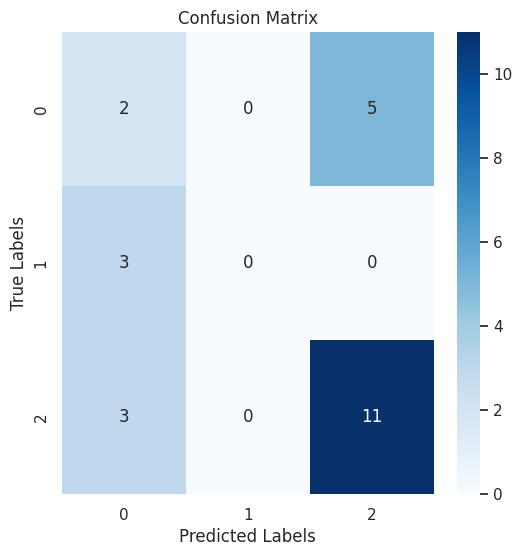

Average Accuracy: 0.6049999999999999
Average Precision: 0.44297152194211015
Average Recall: 0.451984126984127
Average F1-score: 0.4417798435651606
Average Kappa-score: 0.27634937175544233


In [390]:
eval_3label_base(1,'base')

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 1.1012 - accuracy: 0.2295
Epoch 2/100
1/1 [==============================] - 0s 38ms/step - loss: 1.0885 - accuracy: 0.2705
Epoch 3/100
1/1 [==============================] - 0s 41ms/step - loss: 1.1004 - accuracy: 0.1967
Epoch 4/100
1/1 [==============================] - 0s 47ms/step - loss: 1.1043 - accuracy: 0.2131
Epoch 5/100
1/1 [==============================] - 0s 52ms/step - loss: 1.1021 - accuracy: 0.2131
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 1.0957 - accuracy: 0.2869
Epoch 7/100
1/1 [==============================] - 0s 37ms/step - loss: 1.1071 - accuracy: 0.1967
Epoch 8/100
1/1 [==============================] - 0s 46ms/step - loss: 1.0921 - accuracy: 0.2213
Epoch 9/100
1/1 [==============================] - 0s 43ms/step - loss: 1.0940 - accuracy: 0.2295
Epoch 10/100
1/1 [==============================] - 0s 41ms/step - loss: 1.0895 - accuracy: 0.2459
Epoch 11/100
1/1 [===

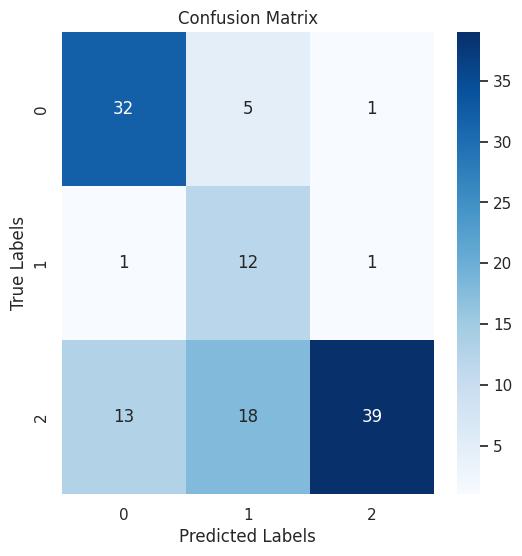

In [374]:
eval_3label_base(1,'large')

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1.1082 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 1.1053 - accuracy: 0.4836
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 1.0956 - accuracy: 0.4508
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 1.0914 - accuracy: 0.4344
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 1.1024 - accuracy: 0.4508
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 1.0928 - accuracy: 0.4590
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 1.0918 - accuracy: 0.5246
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 1.0932 - accuracy: 0.4754
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 1.0919 - accuracy: 0.5328
Epoch 10/100
1/1 [==============================] - 0s 32ms/step - loss: 1.0893 - accuracy: 0.5246
Epoch 11/100
1/1 [===

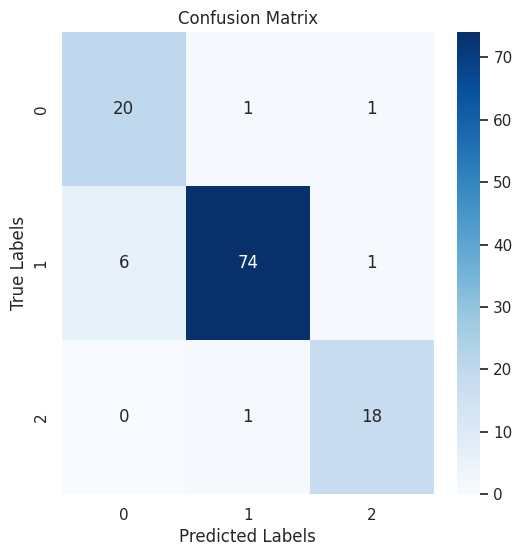

In [375]:
eval_3label_base(2,'base')

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.0984 - accuracy: 0.2213
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 1.0995 - accuracy: 0.1639
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 1.0971 - accuracy: 0.2459
Epoch 4/100
1/1 [==============================] - 0s 30ms/step - loss: 1.0983 - accuracy: 0.2295
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 1.0983 - accuracy: 0.2213
Epoch 6/100
1/1 [==============================] - 0s 32ms/step - loss: 1.1095 - accuracy: 0.2131
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 1.1072 - accuracy: 0.2377
Epoch 8/100
1/1 [==============================] - 0s 35ms/step - loss: 1.0988 - accuracy: 0.2213
Epoch 9/100
1/1 [==============================] - 0s 43ms/step - loss: 1.0933 - accuracy: 0.1885
Epoch 10/100
1/1 [==============================] - 0s 35ms/step - loss: 1.0998 - accuracy: 0.1967
Epoch 11/100
1/1 [===

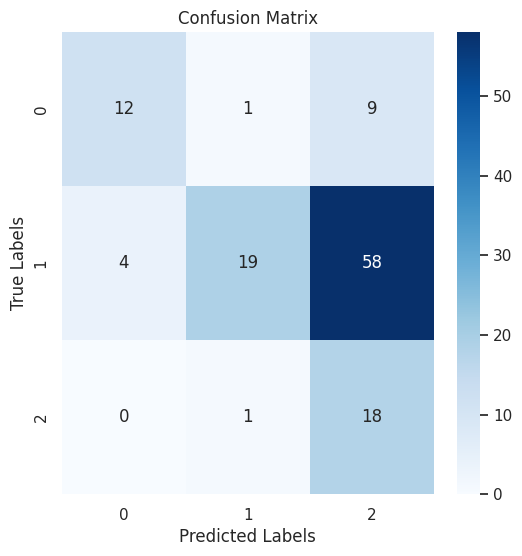

In [376]:
eval_3label_base(2,'large')

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.1003 - accuracy: 0.4016
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 1.0882 - accuracy: 0.4754
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 1.0932 - accuracy: 0.4180
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 1.0899 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 1.0995 - accuracy: 0.4918
Epoch 6/100
1/1 [==============================] - 0s 27ms/step - loss: 1.0927 - accuracy: 0.4426
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 1.0772 - accuracy: 0.4836
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 1.0808 - accuracy: 0.4754
Epoch 9/100
1/1 [==============================] - 0s 27ms/step - loss: 1.0692 - accuracy: 0.5492
Epoch 10/100
1/1 [==============================] - 0s 26ms/step - loss: 1.0748 - accuracy: 0.4754
Epoch 11/100
1/1 [===

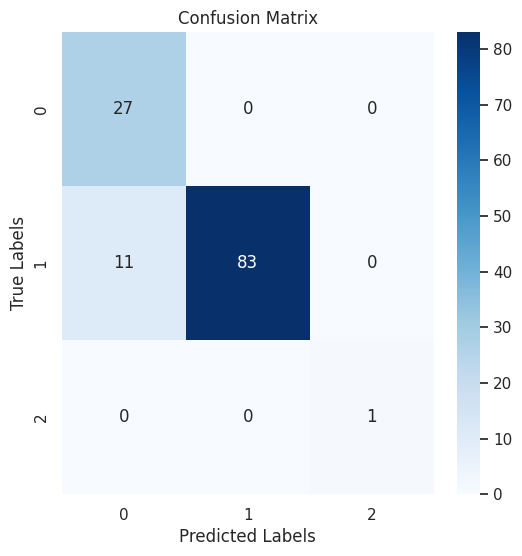

In [377]:
eval_3label_base(3,'base')

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1.1121 - accuracy: 0.3770
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 1.1242 - accuracy: 0.3934
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 1.0909 - accuracy: 0.4262
Epoch 4/100
1/1 [==============================] - 0s 31ms/step - loss: 1.1086 - accuracy: 0.3361
Epoch 5/100
1/1 [==============================] - 0s 30ms/step - loss: 1.0992 - accuracy: 0.4262
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 1.1130 - accuracy: 0.3852
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 1.0963 - accuracy: 0.4508
Epoch 8/100
1/1 [==============================] - 0s 31ms/step - loss: 1.0953 - accuracy: 0.4344
Epoch 9/100
1/1 [==============================] - 0s 31ms/step - loss: 1.0939 - accuracy: 0.4508
Epoch 10/100
1/1 [==============================] - 0s 34ms/step - loss: 1.0670 - accuracy: 0.4672
Epoch 11/100
1/1 [===

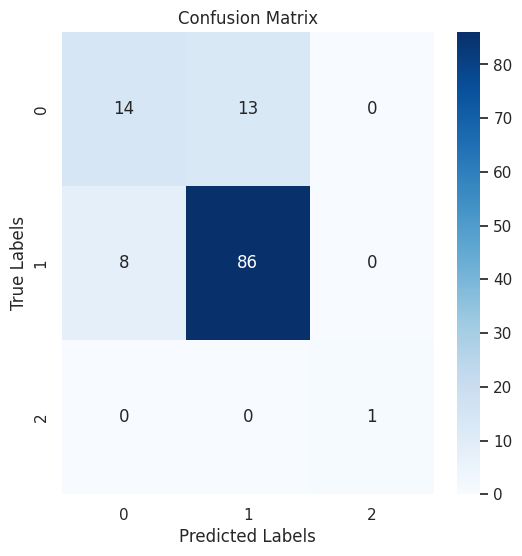

In [378]:
eval_3label_base(3,'large')

###5 Rentang

In [391]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import LSTM, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import cohen_kappa_score

def eval_5label(nomor,variasi_BERT):
    # Inisialisasi list untuk menyimpan metrik evaluasi pada setiap fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    kappa_scores=[]

    # Fungsi untuk membuat model LSTM
    def create_lstm_model(input_shape):
        model = Sequential()
        model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
        model.add(GlobalAveragePooling1D(input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation='relu' ))
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu' ))
        model.add(Dense(len(data_target_5_rentang[target].unique()), activation='softmax'))
        # model.add(Dense(5, activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
        return model

    # Data fitur dan target
    column = f"Jawaban Pertanyaan {nomor}_{variasi_BERT}embeddings"
    X = data_embeddings[column].values
    target = f"Nilai No {nomor}"
    y = data_target_5_rentang[target].values
    panjang_sekuens = len(X[0])
    # Padding data fitur
    X = pad_sequences(X, padding='post', maxlen=panjang_sekuens)

    # Inisialisasi StratifiedKFold dengan jumlah fold yang diinginkan (misalnya 5)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Lakukan cross-validation
    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        class_weights_dict = {i: class_weights[i] for i in range(len(np.unique(y_train)))}

        model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
        model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), verbose=0, class_weight=class_weights_dict)

        # Evaluasi model dengan data pengujian
        y_pred = model.predict(X_test)
        y_pred_labels = np.argmax(y_pred, axis=1)

        # Hitung dan simpan metrik evaluasi pada fold ini
        accuracy_scores.append(accuracy_score(y_test, y_pred_labels))
        precision_scores.append(precision_score(y_test, y_pred_labels, average='macro'))
        recall_scores.append(recall_score(y_test, y_pred_labels, average='macro'))
        f1_scores.append(f1_score(y_test, y_pred_labels, average='macro'))
        cm = confusion_matrix(y_test, y_pred_labels)
        kappa_scores.append(cohen_kappa_score(y_test, y_pred_labels))



    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

    # Tampilkan rata-rata dari metrik evaluasi pada seluruh folds
    print("Average Accuracy:", np.mean(accuracy_scores))
    print("Average Precision:", np.mean(precision_scores))
    print("Average Recall:", np.mean(recall_scores))
    print("Average F1-score:", np.mean(f1_scores))
    print("Average Kappa-score:", np.mean(kappa_scores))

In [354]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import LSTM, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import cohen_kappa_score

def eval_5label(nomor, variasi_BERT):
    # Fungsi untuk membuat model LSTM
    def create_lstm_model(input_shape):
        model = Sequential()
        model.add(LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
        model.add(GlobalAveragePooling1D(input_shape=(X.shape[1], X.shape[2])))
        model.add(Dropout(0.2))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(len(EFB_dataset_target_5_label[target].unique()), activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
        return model

    # Data fitur dan target
    column = f"Jawaban Pertanyaan {nomor}_{variasi_BERT}embeddings"
    X = data_embeddings[column].values
    target = f"Nilai No {nomor}"
    y = EFB_dataset_target_5_label[target].values
    panjang_sekuens = len(X[0])
    # Padding data fitur
    X = pad_sequences(X, padding='post', maxlen=panjang_sekuens)

    # Inisialisasi model LSTM
    class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
    class_weights_dict = {i: class_weights[i] for i in range(len(np.unique(y)))}
    model = create_lstm_model(input_shape=(X.shape[1], X.shape[2]))
    model.fit(X, y, epochs=100, batch_size=128, class_weight=class_weights_dict, verbose=1)

    # Evaluasi model dengan data pengujian (menggunakan seluruh data)
    y_pred = model.predict(X)
    y_pred_labels = np.argmax(y_pred, axis=1)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y, y_pred_labels)
    precision = precision_score(y, y_pred_labels, average='macro')
    recall = recall_score(y, y_pred_labels, average='macro')
    f1 = f1_score(y, y_pred_labels, average='macro')
    cm = confusion_matrix(y, y_pred_labels)
    kappa = cohen_kappa_score(y, y_pred_labels)

    # Tampilkan hasil evaluasi
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Kappa-score:", kappa)

    # Tampilkan confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()


In [412]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import LSTM, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import cohen_kappa_score

# Fungsi untuk membuat model LSTM awal tanpa fine-tuning
def create_lstm_model_base(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(GlobalAveragePooling1D(input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
    return model

# Fungsi untuk membuat model LSTM yang telah di-fine-tuned
def create_lstm_model_fine_tuned(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(GlobalAveragePooling1D(input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
    return model

def crossval_5label(nomor, variasi_BERT):
    # Data fitur dan target
    column = f"Jawaban Pertanyaan {nomor}_{variasi_BERT}embeddings"
    X = data_embeddings[column].values
    target = f"Nilai No {nomor}"
    y = data_target_5_rentang[target].values
    num_classes = len(data_target_5_rentang[target].unique())
    panjang_sekuens = len(X[0])
    # Padding data fitur
    X = pad_sequences(X, padding='post', maxlen=panjang_sekuens)

    # Inisialisasi StratifiedKFold dengan jumlah fold yang diinginkan (misalnya 5)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Inisialisasi list untuk menyimpan metrik evaluasi pada setiap fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    kappa_scores = []

    # Lakukan cross-validation
    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        class_weights_dict = {i: class_weights[i] for i in range(len(np.unique(y_train)))}

        # Inisialisasi model LSTM awal
        model_base = create_lstm_model_base(input_shape=(X.shape[1], X.shape[2]), num_classes=num_classes)
        model_base.fit(X_train, y_train, epochs=100, batch_size=128, class_weight=class_weights_dict, verbose=1)

        # Buat model LSTM fine-tuned dengan model_base sebagai dasar
        model_fine_tuned = create_lstm_model_fine_tuned(input_shape=(X.shape[1], X.shape[2]), num_classes=num_classes)
        # Melepaskan beberapa lapisan atas dan mengatur lapisan bawah agar tidak dibekukan
        for layer in model_fine_tuned.layers[:-3]:
            layer.trainable = False

        # Latih model fine-tuned pada data pelatihan
        model_fine_tuned.fit(X_train, y_train, epochs=50, batch_size=128, class_weight=class_weights_dict, verbose=1)

        # Evaluasi model fine-tuned pada data pengujian
        y_pred = model_fine_tuned.predict(X_test)
        y_pred_labels = np.argmax(y_pred, axis=1)

        # Hitung dan simpan metrik evaluasi pada fold ini
        accuracy_scores.append(accuracy_score(y_test, y_pred_labels))
        precision_scores.append(precision_score(y_test, y_pred_labels, average='macro'))
        recall_scores.append(recall_score(y_test, y_pred_labels, average='macro'))
        f1_scores.append(f1_score(y_test, y_pred_labels, average='macro'))
        cm = confusion_matrix(y_test, y_pred_labels)
        kappa_scores.append(cohen_kappa_score(y_test, y_pred_labels))

    # Tampilkan rata-rata dari metrik evaluasi pada seluruh folds
    print("Average Accuracy:", np.mean(accuracy_scores))
    print("Average Precision:", np.mean(precision_scores))
    print("Average Recall:", np.mean(recall_scores))
    print("Average F1-score:", np.mean(f1_scores))
    print("Average Kappa-score:", np.mean(kappa_scores))

    # Visualisasi confusion matrix untuk model terakhir pada seluruh data pengujian
    cm = confusion_matrix(y, model.predict_classes(X))
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix (All Test Data)")
    plt.show()


In [414]:
crossval_5label(1,'base')

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.3847 - accuracy: 0.1753
Epoch 2/100
1/1 [==============================] - 0s 37ms/step - loss: 1.3759 - accuracy: 0.1959
Epoch 3/100
1/1 [==============================] - 0s 33ms/step - loss: 1.3758 - accuracy: 0.2062
Epoch 4/100
1/1 [==============================] - 0s 43ms/step - loss: 1.3843 - accuracy: 0.1856
Epoch 5/100
1/1 [==============================] - 0s 33ms/step - loss: 1.3664 - accuracy: 0.2371
Epoch 6/100
1/1 [==============================] - 0s 39ms/step - loss: 1.3604 - accuracy: 0.2577
Epoch 7/100
1/1 [==============================] - 0s 38ms/step - loss: 1.3645 - accuracy: 0.1959
Epoch 8/100
1/1 [==============================] - 0s 32ms/step - loss: 1.3537 - accuracy: 0.2887
Epoch 9/100
1/1 [==============================] - 0s 36ms/step - loss: 1.3627 - accuracy: 0.2062
Epoch 10/100
1/1 [==============================] - 0s 42ms/step - loss: 1.3656 - accuracy: 0.2371
Epoch 11/100
1/1 [===

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
1/1 [==============================] - 15s 15s/step - loss: 1.3875 - accuracy: 0.2371
Epoch 2/100
1/1 [==============================] - 0s 40ms/step - loss: 1.3692 - accuracy: 0.2268
Epoch 3/100
1/1 [==============================] - 0s 53ms/step - loss: 1.3778 - accuracy: 0.2165
Epoch 4/100
1/1 [==============================] - 0s 46ms/step - loss: 1.3837 - accuracy: 0.2680
Epoch 5/100
1/1 [==============================] - 0s 60ms/step - loss: 1.3869 - accuracy: 0.2371
Epoch 6/100
1/1 [==============================] - 0s 57ms/step - loss: 1.3651 - accuracy: 0.3299
Epoch 7/100
1/1 [==============================] - 0s 41ms/step - loss: 1.3769 - accuracy: 0.2577
Epoch 8/100
1/1 [==============================] - 0s 35ms/step - loss: 1.3559 - accuracy: 0.2680
Epoch 9/100
1/1 [==============================] - 0s 34ms/step - loss: 1.3651 - accuracy: 0.2474
Epoch 10/100
1/1 [==============================] - 0s 42ms/step - loss: 1.3601 - accuracy: 0.2784
Epoch 11/100
1/1 [=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.3862 - accuracy: 0.2143
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 1.3806 - accuracy: 0.2551
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 1.3735 - accuracy: 0.2551
Epoch 4/100
1/1 [==============================] - 0s 28ms/step - loss: 1.3826 - accuracy: 0.2449
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 1.3738 - accuracy: 0.2653
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 1.3675 - accuracy: 0.3061
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 1.3635 - accuracy: 0.2653
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 1.3739 - accuracy: 0.2857
Epoch 9/100
1/1 [==============================] - 0s 28ms/step - loss: 1.3634 - accuracy: 0.2755
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 1.3595 - accuracy: 0.2653
Epoch 11/100
1/1 [===

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.3722 - accuracy: 0.3776
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 1.3849 - accuracy: 0.2959
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 1.3680 - accuracy: 0.3673
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 1.3773 - accuracy: 0.3571
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 1.3765 - accuracy: 0.3571
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 1.3763 - accuracy: 0.3571
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 1.3722 - accuracy: 0.3469
Epoch 8/100
1/1 [==============================] - 0s 28ms/step - loss: 1.3655 - accuracy: 0.3571
Epoch 9/100
1/1 [==============================] - 0s 28ms/step - loss: 1.3597 - accuracy: 0.3776
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 1.3657 - accuracy: 0.3469
Epoch 11/100
1/1 [===

AttributeError: ignored

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 1.3913 - accuracy: 0.1803
Epoch 2/100
1/1 [==============================] - 0s 39ms/step - loss: 1.3896 - accuracy: 0.1557
Epoch 3/100
1/1 [==============================] - 0s 35ms/step - loss: 1.3848 - accuracy: 0.1639
Epoch 4/100
1/1 [==============================] - 0s 40ms/step - loss: 1.3939 - accuracy: 0.1639
Epoch 5/100
1/1 [==============================] - 0s 46ms/step - loss: 1.3843 - accuracy: 0.2049
Epoch 6/100
1/1 [==============================] - 0s 46ms/step - loss: 1.3885 - accuracy: 0.1803
Epoch 7/100
1/1 [==============================] - 0s 41ms/step - loss: 1.3770 - accuracy: 0.2377
Epoch 8/100
1/1 [==============================] - 0s 42ms/step - loss: 1.3909 - accuracy: 0.1967
Epoch 9/100
1/1 [==============================] - 0s 52ms/step - loss: 1.3774 - accuracy: 0.2459
Epoch 10/100
1/1 [==============================] - 0s 47ms/step - loss: 1.3870 - accuracy: 0.2295
Epoch 11/100
1/1 [===

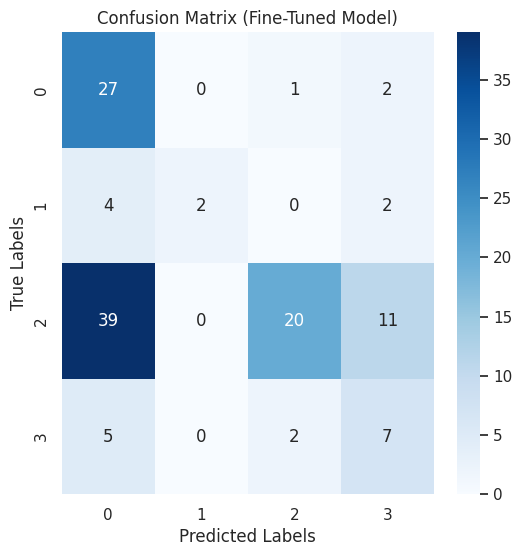

In [405]:
eval_5label(1,'large')

Epoch 1/100
1/1 [==============================] - 11s 11s/step - loss: 1.1091 - accuracy: 0.6311
Epoch 2/100
1/1 [==============================] - 0s 50ms/step - loss: 1.1081 - accuracy: 0.6148
Epoch 3/100
1/1 [==============================] - 0s 55ms/step - loss: 1.1078 - accuracy: 0.6557
Epoch 4/100
1/1 [==============================] - 0s 62ms/step - loss: 1.0993 - accuracy: 0.6230
Epoch 5/100
1/1 [==============================] - 0s 83ms/step - loss: 1.0965 - accuracy: 0.6230
Epoch 6/100
1/1 [==============================] - 0s 68ms/step - loss: 1.0972 - accuracy: 0.6475
Epoch 7/100
1/1 [==============================] - 0s 88ms/step - loss: 1.0889 - accuracy: 0.6393
Epoch 8/100
1/1 [==============================] - 0s 55ms/step - loss: 1.0947 - accuracy: 0.6557
Epoch 9/100
1/1 [==============================] - 0s 66ms/step - loss: 1.0858 - accuracy: 0.5410
Epoch 10/100
1/1 [==============================] - 0s 59ms/step - loss: 1.0922 - accuracy: 0.6066
Epoch 11/100
1/1 [=

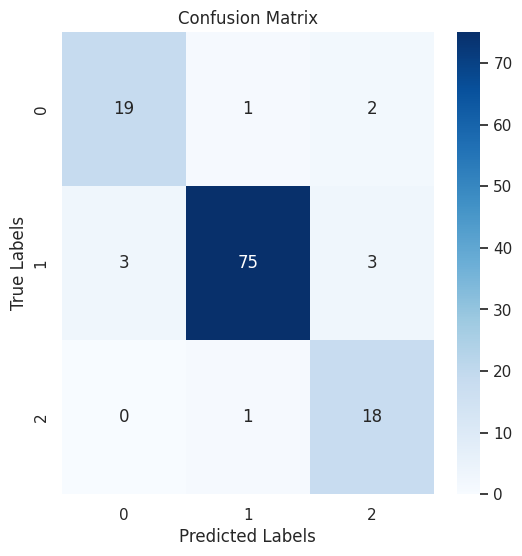

In [359]:
eval_5label(2,'base')

Epoch 1/100
1/1 [==============================] - 11s 11s/step - loss: 1.1015 - accuracy: 0.1639
Epoch 2/100
1/1 [==============================] - 0s 40ms/step - loss: 1.1068 - accuracy: 0.1803
Epoch 3/100
1/1 [==============================] - 0s 39ms/step - loss: 1.1025 - accuracy: 0.1393
Epoch 4/100
1/1 [==============================] - 0s 37ms/step - loss: 1.1074 - accuracy: 0.1393
Epoch 5/100
1/1 [==============================] - 0s 39ms/step - loss: 1.1038 - accuracy: 0.1557
Epoch 6/100
1/1 [==============================] - 0s 40ms/step - loss: 1.1051 - accuracy: 0.1721
Epoch 7/100
1/1 [==============================] - 0s 58ms/step - loss: 1.1062 - accuracy: 0.1639
Epoch 8/100
1/1 [==============================] - 0s 62ms/step - loss: 1.0963 - accuracy: 0.1967
Epoch 9/100
1/1 [==============================] - 0s 44ms/step - loss: 1.1060 - accuracy: 0.1393
Epoch 10/100
1/1 [==============================] - 0s 44ms/step - loss: 1.0968 - accuracy: 0.1721
Epoch 11/100
1/1 [=

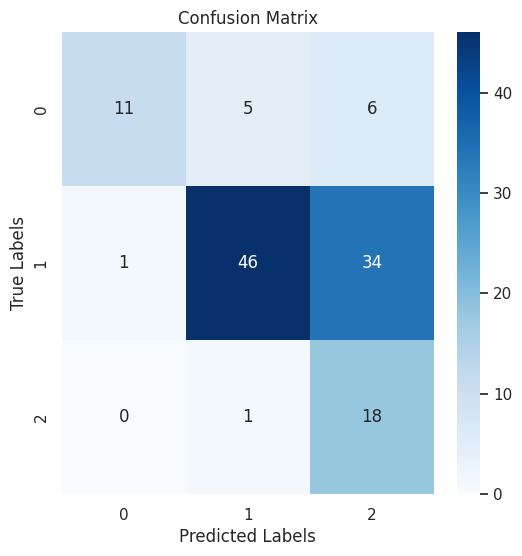

In [360]:
eval_5label(2,'large')

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 1.0959 - accuracy: 0.1721
Epoch 2/100
1/1 [==============================] - 0s 35ms/step - loss: 1.1010 - accuracy: 0.2049
Epoch 3/100
1/1 [==============================] - 0s 46ms/step - loss: 1.0944 - accuracy: 0.2131
Epoch 4/100
1/1 [==============================] - 0s 42ms/step - loss: 1.0873 - accuracy: 0.2049
Epoch 5/100
1/1 [==============================] - 0s 45ms/step - loss: 1.1039 - accuracy: 0.2049
Epoch 6/100
1/1 [==============================] - 0s 56ms/step - loss: 1.0773 - accuracy: 0.1967
Epoch 7/100
1/1 [==============================] - 0s 40ms/step - loss: 1.0860 - accuracy: 0.2131
Epoch 8/100
1/1 [==============================] - 0s 47ms/step - loss: 1.1123 - accuracy: 0.2131
Epoch 9/100
1/1 [==============================] - 0s 47ms/step - loss: 1.0799 - accuracy: 0.2131
Epoch 10/100
1/1 [==============================] - 0s 55ms/step - loss: 1.0810 - accuracy: 0.2049
Epoch 11/100
1/1 [===

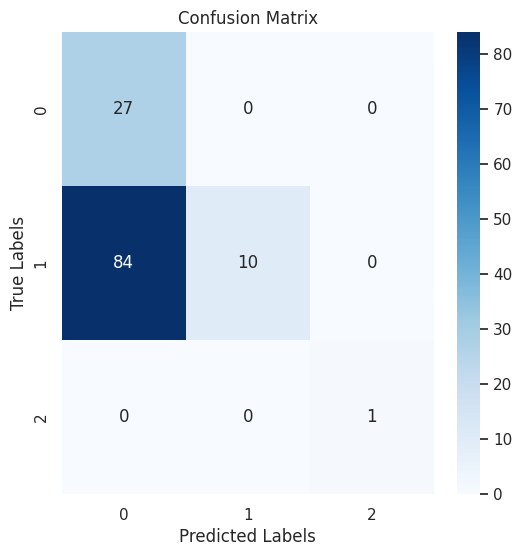

In [361]:
eval_5label(3,'base')

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 1.0961 - accuracy: 0.3279
Epoch 2/100
1/1 [==============================] - 0s 49ms/step - loss: 1.1101 - accuracy: 0.2869
Epoch 3/100
1/1 [==============================] - 0s 41ms/step - loss: 1.0973 - accuracy: 0.3607
Epoch 4/100
1/1 [==============================] - 0s 41ms/step - loss: 1.1044 - accuracy: 0.3115
Epoch 5/100
1/1 [==============================] - 0s 43ms/step - loss: 1.0930 - accuracy: 0.3115
Epoch 6/100
1/1 [==============================] - 0s 48ms/step - loss: 1.0947 - accuracy: 0.3689
Epoch 7/100
1/1 [==============================] - 0s 44ms/step - loss: 1.1027 - accuracy: 0.3525
Epoch 8/100
1/1 [==============================] - 0s 51ms/step - loss: 1.1064 - accuracy: 0.4262
Epoch 9/100
1/1 [==============================] - 0s 43ms/step - loss: 1.1015 - accuracy: 0.3770
Epoch 10/100
1/1 [==============================] - 0s 41ms/step - loss: 1.0855 - accuracy: 0.3525
Epoch 11/100
1/1 [===

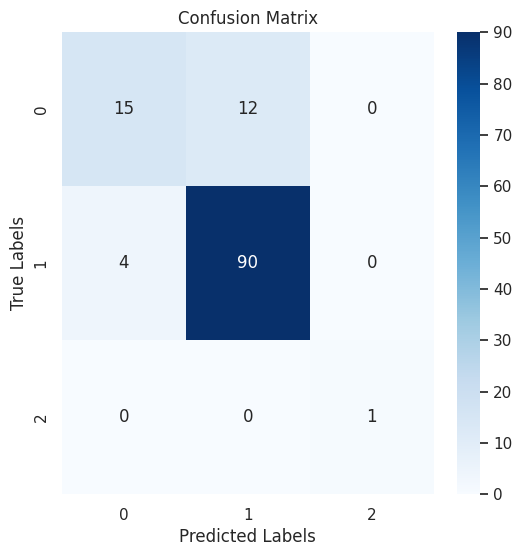

In [362]:
eval_5label(3,'large')